<a href="https://colab.research.google.com/github/missLaiba22/Fruits-and-Vegetables-Recognition-System/blob/main/Fruits_and_Vegetables_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Selection:** A Diverse Palette of Everyday Fruits and Vegetables
**Focus and Composition:**

**Variety:** This dataset boasts a diverse selection of 36 everyday fruits and vegetables, catering to a wide range of culinary applications and dietary needs.
Fruit Selection: 10 popular fruits like bananas, apples, and pears offer a familiar base.

**Vegetable Selection:** 26 vegetables, including staples like potatoes and onions alongside unique options like jalepeños and spinach, add depth and variety.

**Organization and Accessibility:**

**Structured Folders:** The dataset is meticulously organized into separate folders for training, testing, and validation.

**Balanced Representation:** Each folder contains 100 images for training, 10 images for testing, and 10 images for validation, ensuring balanced representation across all food items.

**Subfolder Categorization:** Images are further categorized into subfolders for each fruit and vegetable, facilitating efficient navigation and analysis.

**Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# **Exploratory Data Analysis (EDA)**

**Purpose:**

This script meticulously examines the class distribution within the training, testing, and validation sets of an image dataset. It generates comprehensive visualizations using bar charts to illuminate the representation of each class, empowering informed decisions for model training and evaluation.

**Key Steps:**

1. **Import Essential Libraries:**
   - **os:** Seamlessly navigates file paths for dataset access.
   - **matplotlib.pyplot:** Crafts informative visualizations for analysis.
   - **numpy:** Facilitates numerical operations and array manipulation.
   - **image_dataset_from_directory:** Efficiently loads image datasets from their respective directories.

2. **Establish Dataset Parameters:**
   - Define precise paths to the training, testing, and validation dataset directories.
   - Determine the batch size for image loading, ensuring optimal memory usage.
   - Specify the desired image resizing dimensions for consistency and model compatibility.

3. **Load Datasets Meticulously:**
   - Employ `image_dataset_from_directory` to gracefully load images and their corresponding labels for each dataset.
   - Encode labels as one-hot vectors to facilitate multi-class classification tasks.
   - Strategically disable shuffling to preserve the original image order, paramount for accurate class distribution analysis.

4. **Extract Class Names:**
   - Retrieve class names directly from the loaded training dataset for clarity and consistency.

5. **Scrutinize Samples per Class:**
   - Meticulously count the number of images belonging to each class within each dataset, unveiling potential imbalances.

6. **Craft Informative Visualization:**
   - Construct a multi-panel plot showcasing three juxtaposed bar charts, each dedicated to a specific dataset.
   - Represent the number of images within each class using visually compelling bars for effortless interpretation.
   - Rotate x-axis labels strategically to enhance readability and prevent overlapping.
   - Display the plot prominently, inviting thorough examination and interpretation.

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


<ipython-input-3-030f58e6fdf9>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(class_names, rotation=45, ha='right')  # Rotate labels on x-axis
<ipython-input-3-030f58e6fdf9>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(class_names, rotation=45, ha='right')  # Rotate labels on x-axis
<ipython-input-3-030f58e6fdf9>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(class_names, rotation=45, ha='right')  # Rotate labels on x-axis


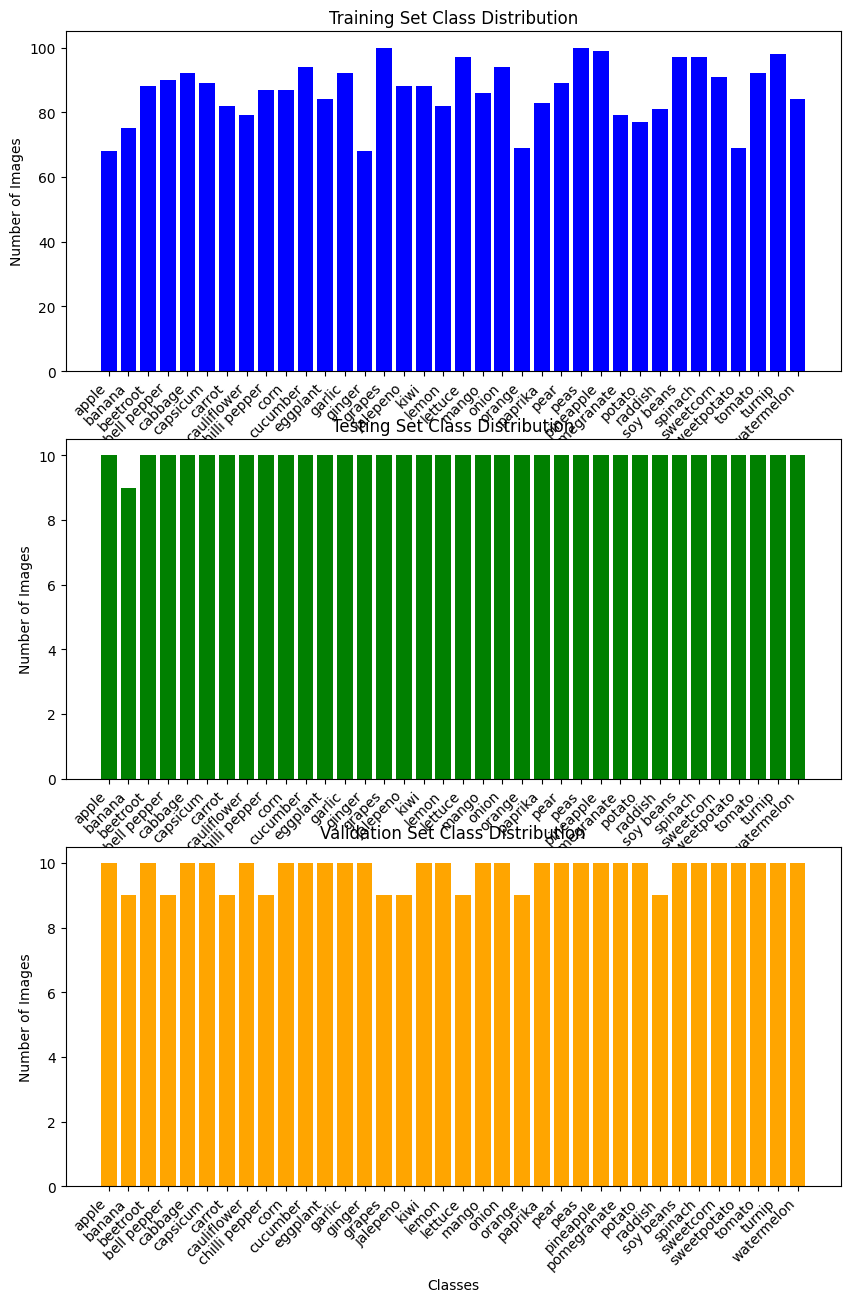

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the paths to the datasets
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'
validation_dir = '/content/drive/MyDrive/validation'

# Set the batch size and image size
batch_size = 32
image_size = (64, 64)

# Load datasets using image_dataset_from_directory
train_dataset = image_dataset_from_directory(train_dir, label_mode='categorical', batch_size=batch_size, image_size=image_size, shuffle=False)
test_dataset = image_dataset_from_directory(test_dir, label_mode='categorical', batch_size=batch_size, image_size=image_size, shuffle=False)
validation_dataset = image_dataset_from_directory(validation_dir, label_mode='categorical', batch_size=batch_size, image_size=image_size, shuffle=False)

# Use class names directly from the dataset
class_names = train_dataset.class_names

# Count the number of samples per class in the training set
train_class_counts = np.sum(np.vstack([labels.numpy() for _, labels in train_dataset]), axis=0)

# Count the number of samples per class in the testing set
test_class_counts = np.sum(np.vstack([labels.numpy() for _, labels in test_dataset]), axis=0)

# Count the number of samples per class in the validation set
validation_class_counts = np.sum(np.vstack([labels.numpy() for _, labels in validation_dataset]), axis=0)

# Plot the class distribution
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.bar(class_names, train_class_counts, color='blue')
ax1.set_title('Training Set Class Distribution')
ax1.set_ylabel('Number of Images')
ax1.set_xticklabels(class_names, rotation=45, ha='right')  # Rotate labels on x-axis

ax2.bar(class_names, test_class_counts, color='green')
ax2.set_title('Testing Set Class Distribution')
ax2.set_ylabel('Number of Images')
ax2.set_xticklabels(class_names, rotation=45, ha='right')  # Rotate labels on x-axis

ax3.bar(class_names, validation_class_counts, color='orange')
ax3.set_title('Validation Set Class Distribution')
ax3.set_ylabel('Number of Images')
ax3.set_xticklabels(class_names, rotation=45, ha='right')  # Rotate labels on x-axis

plt.xlabel('Classes')
plt.show()


**Class Distribution Analysis**

**Equal Distribution Across Sets:** The analysis of class distributions within the training, testing, and validation sets revealed a consistent and balanced representation of images for each fruit and vegetable class. This consistency is essential for ensuring reliable model training, evaluation, and generalizability.

**Implications for Model Performance:** The balanced class distribution is expected to contribute to unbiased model performance, as it prevents the model from excessively favoring or overlooking specific classes during training. This, in turn, should lead to more accurate and equitable classification results.

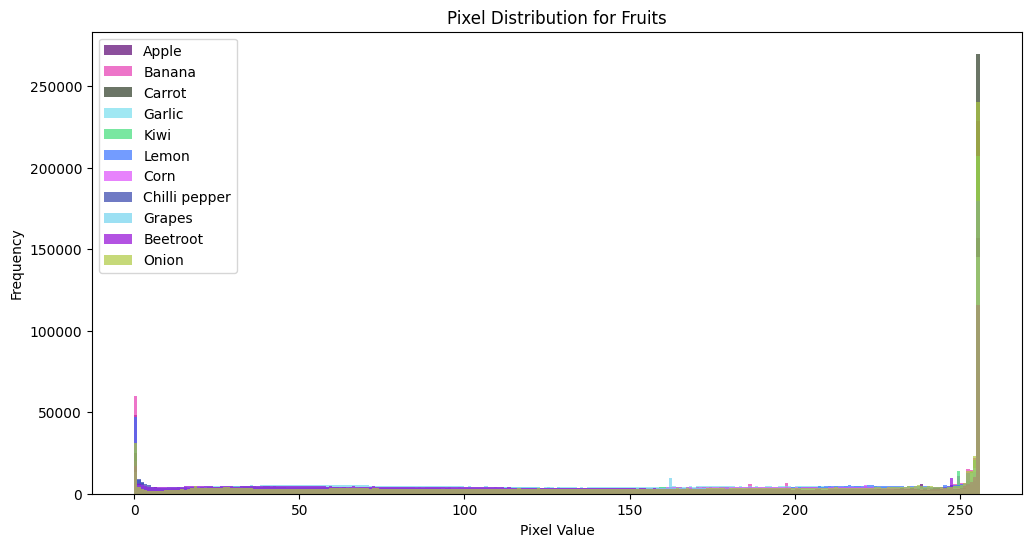

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to plot pixel distribution
def plot_pixel_distribution(images_list, class_names, title):
    plt.figure(figsize=(12, 6))

    for images, class_name in zip(images_list, class_names):
        # Flatten images and concatenate pixel values
        pixels = np.concatenate([img.flatten() for img in images])

        # Plot histogram with specific color and alpha
        plt.hist(pixels, bins=256, range=(0, 256), alpha=0.7, label=class_name, color=np.random.rand(3,))

    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Load images for multiple fruit folders
fruit_folders = ['apple', 'banana', 'carrot', 'garlic','kiwi','lemon','corn','chilli pepper','grapes','beetroot','onion']  # Specify the fruit folder names
fruit_paths = ['/content/drive/MyDrive/train/' + folder for folder in fruit_folders]

# Load images using Keras image preprocessing
fruit_images_list = []
class_names = []

for path, folder in zip(fruit_paths, fruit_folders):
    image_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith(('.jpg', '.jpeg', '.png'))]
    images = [image.load_img(img, target_size=(64, 64)) for img in image_files]
    images = [image.img_to_array(img) for img in images]
    images = [np.expand_dims(img, axis=0) for img in images]

    fruit_images_list.append(images)
    class_names.append(folder.capitalize())  # Assuming class names are the capitalized folder names

# Plot pixel distribution for multiple fruits with enhanced color visibility
plot_pixel_distribution(fruit_images_list, class_names, 'Pixel Distribution for Fruits')



**Graph Title:** Pixel Distribution for Fruits

**Description:**

- This graph visualizes the distribution of pixel values within images of different fruits.
- It displays how frequently each pixel value (ranging from 0 to 255) appears within each fruit class.
- The graph aids in understanding the color characteristics and potential challenges in distinguishing fruits based on pixel values.

**Axes:**

- X-axis: Pixel Value (0-255) representing the intensity of each pixel in a typical 8-bit color image.
- Y-axis: Frequency (0-250000) indicating the abundance of each pixel value within the images.

**Histograms:**

- Each colored histogram represents the pixel distribution for a specific fruit class.
- The shape of the histogram reveals color tendencies (e.g., unimodal for a dominant color, multimodal for multiple prominent colors, flat for less color distinction).


# **Image Processing**



**1. Essential Library Imports:**

- **OpenCV (cv2):** This versatile library is imported to unlock a comprehensive suite of tools for computer vision tasks, including image loading, processing, analysis, and manipulation.
- **Matplotlib.pyplot (as plt):** This powerful library is imported under the alias "plt" to enable the creation of informative visualizations, specifically for displaying images in a clear and engaging manner.

**2. Image Acquisition:**

- **Image Loading:** The code meticulously retrieves an image file from its designated path using the `plt.imread()` function. This function seamlessly reads the image data and stores it within a variable named `pic1`, preparing it for further exploration and manipulation.

**3. Image Visualization:**

- **Rendering the Image:** The code gracefully employs the `plt.imshow()` function to unveil the image captured within the `pic1` variable. This function meticulously renders the image onto the screen, harnessing the visual capabilities of Matplotlib to facilitate analysis and interpretation.


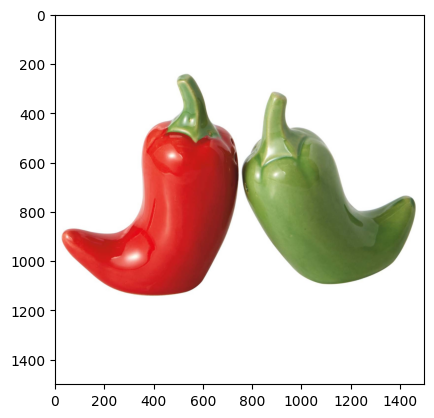

In [ ]:
import cv2
import matplotlib.pyplot as plt

pic1 = plt.imread('/content/drive/MyDrive/test/chilli pepper/Image_6.jpeg')
plt.imshow(pic1)

**Image Conversion and Visualization: From Color to Grayscale**

**1. Image Acquisition:**

- **Image Loading:** The code commences by reading an image file from its designated path and storing it within the variable `pic1`. This variable holds the raw image data, ready for further processing.

**2. Color to Grayscale Transformation:**

- **Channel Reduction:** The code leverages OpenCV's `cv2.cvtColor()` function to meticulously transform the color image, initially represented by three channels (red, green, and blue), into a grayscale image. This transformation gracefully condenses the color information into a single channel, capturing only the intensity values for each pixel.
- **Grayscale Representation:** The resulting grayscale image is meticulously stored within the variable `img`, prepared for display and subsequent analysis.

**3. Grayscale Image Visualization:**

- **Visual Rendition:** To unveil the transformed grayscale image, the code strategically employs Matplotlib's `plt.imshow()` function. This function renders the image onto the screen, employing a grayscale colormap, specified by `cmap='gray'`, to accurately represent its intensity values.

**Grayscale Image Significance:**

- **Simplified Representation:** Grayscale images elegantly simplify visual information by employing a single channel to encode intensity values, ranging from black to white. This contrasts with multi-channel color images, which often utilize red, green, and blue channels.
- **Essential Information Preservation:** While color information is removed during grayscale conversion, the image's fundamental structure and essential details remain intact within the intensity channel. This enables a focus on these core elements without the complexity of color.
- **Computational Efficiency:** Grayscale images often offer computational advantages compared to color images, owing to their reduced dimensionality. This can lead to faster processing times and more memory-efficient operations, making them valuable for resource-constrained scenarios.


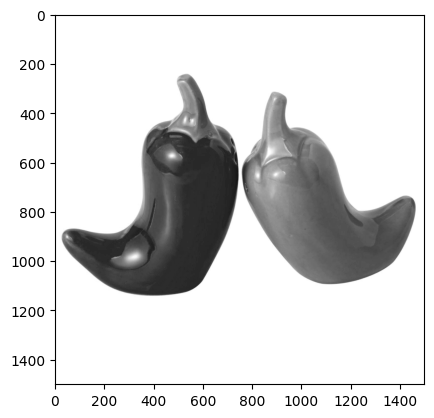

In [ ]:
#Converting the sample image to grayscale

img = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

 **Thresholding Exploration: Fine-Tuning Image Segmentation**

**Purpose:**

- To segment an image into distinct regions based on pixel intensity values, separating objects of interest from the background.
- To investigate the impact of threshold value selection on segmentation outcomes, enabling optimization for specific tasks.

**Code Steps:**

1. **Thresholding Application:**
   - The code employs OpenCV's `cv2.threshold()` function to apply binary thresholding to the image.
   - **Threshold Value:** A threshold value of 140 is initially set, indicating that pixels with intensities equal to or greater than 140 will be assigned a value of 255 (white), while pixels with intensities below 140 will be assigned a value of 0 (black).
   - **Binary Thresholding:** The `THRESH_BINARY` mode is specified, resulting in a distinct separation of pixels into two classes based on the threshold.

2. **Return Values:**
   - The function returns two values:
      - `ret`: A scalar value representing the chosen threshold (140 in this case).
      - `thresh1`: The resulting binary image after thresholding.

3. **Visualization:**
   - Matplotlib's `plt.imshow()` function is used to display the thresholded image, employing a grayscale colormap for clarity.

**Interactive Exploration:**

- The code encourages experimentation with different threshold values to observe their effects on the segmentation.
- By adjusting the threshold value, you can fine-tune the segmentation to accurately isolate the desired objects or features within the image.

**Key Points:**

- **Threshold Value's Significance:** The threshold value acts as a pivotal decision boundary, governing which pixels are classified as foreground and background.
- **Careful Selection:** Choosing an appropriate threshold value is crucial for achieving accurate and meaningful segmentation results.
- **Visual Evaluation:** Visually examining the thresholded images for different threshold values is essential to assess their effectiveness and identify the optimal setting for a given task.
- **Interactive Exploration:** Experimentation with threshold values is encouraged to develop a deeper understanding of their impact on segmentation outcomes and to tailor segmentation to specific requirements.


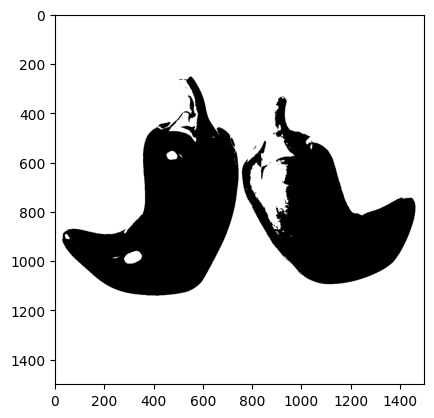

In [ ]:
#Thresholding: the threshold value (144 here) to see the changes

ret, thresh1 = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

 **Noise Reduction with Median Filter**

**Purpose:**

- To mitigate noise within an image, enhancing its clarity and preserving essential features for subsequent analysis tasks.

**Steps:**

1. **Image Conversion to Grayscale:**
   - The original image is transformed into grayscale using `cv2.cvtColor()`, reducing color channels to a single intensity channel for noise reduction.

2. **Median Filter Application:**
   - The `cv2.medianBlur()` function is employed to meticulously apply a median filter to the grayscale image, effectively reducing noise while preserving edges.
   - The filter size is specified as 5, indicating that a 5x5 neighborhood of pixels will be considered for each pixel's processing.

3. **Visualization of Original and Filtered Images:**
   - Matplotlib is utilized to create a side-by-side visualization of the original noisy image and the filtered image, enabling a visual assessment of the filter's impact.
   - The figure size is set to 16x16 for enhanced clarity.

**Key Observations:**

- **Noise Reduction:** The median filter demonstrates its efficacy in reducing noise within the image, leading to a smoother and less grainy appearance.
- **Edge Preservation:** Unlike some other blurring techniques, the median filter excels in preserving the edges of objects and structures within the image, maintaining image integrity.

**Importance in EDA:**

- **Enhancing Image Quality:** Noise reduction through median filtering is crucial in EDA to ensure that subsequent analysis and feature extraction are based on clean and accurate representations of the image content.
- **Improving Feature Visibility:** By mitigating noise, the median filter can reveal features that might have been obscured or distorted, enabling their identification and analysis.
- **Preparing for Further Analysis:** The filtered image often serves as a more reliable input for various image processing tasks, such as segmentation, object detection, and classification.


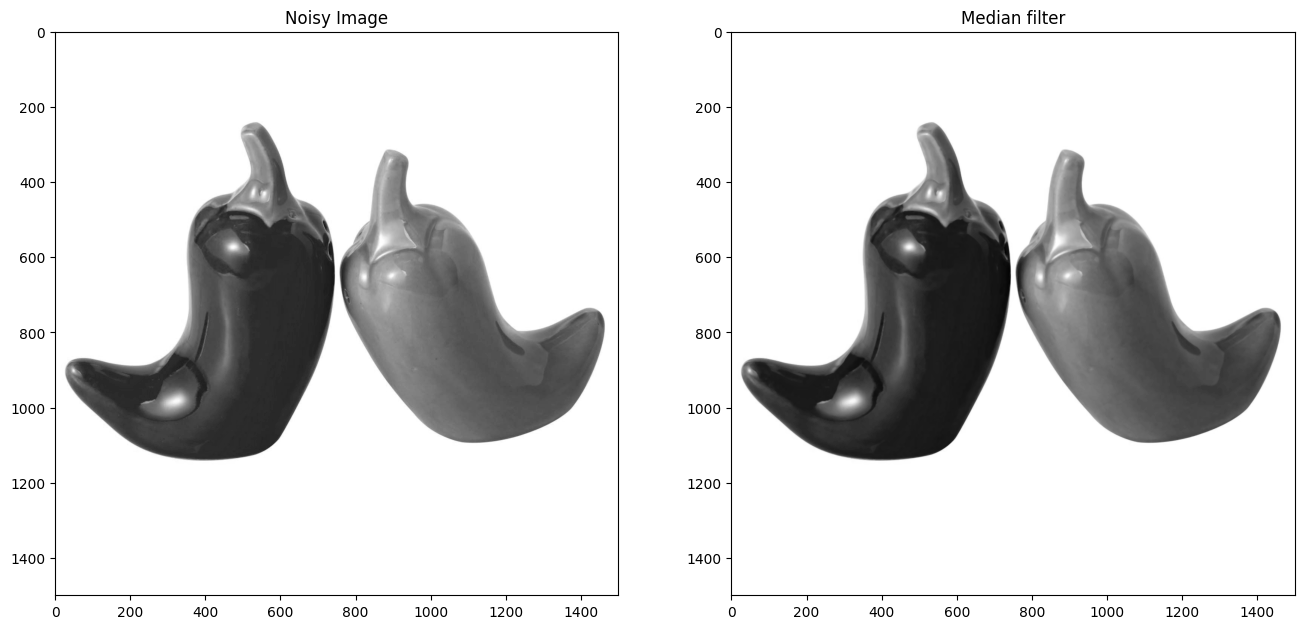

In [ ]:
#Median filter

img = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

**Gaussian Blur in Image Processing: A Blurring Technique for Noise Reduction and Smoothing**

**Key Concepts:**

- **Gaussian Distribution:** Gaussian blur employs a weighted average of pixel values within a defined neighborhood, with weights based on the Gaussian distribution, a bell-shaped curve that emphasizes pixels closer to the center of the neighborhood.
- **Sigma Value (σ):** This parameter controls the extent of blurring, representing the standard deviation of the Gaussian distribution. Larger sigma values lead to greater blurring and detail loss, while smaller values produce more subtle smoothing.

**Purposes:**

- **Noise Reduction:** Gaussian blur effectively reduces noise, such as salt-and-pepper noise or high-frequency artifacts, by averaging out pixel values and suppressing intensity variations.
- **Image Smoothing:** It creates a smoother and more visually appealing image, reducing sharp edges and fine details while preserving overall structure and larger features.


**Code Snippet Insights:**

- **Demonstration:** The code illustrates the impact of varying sigma values on the degree of smoothing applied to an original noisy image.
- **Visual Comparison:** It enables the visualization of resulting images with different blurring strengths, showcasing the trade-off between noise reduction and detail preservation.

**Essential Considerations:**

- **Balance:** Choosing an appropriate sigma value is crucial to balance noise reduction with detail preservation, aligning with the specific application and desired outcomes.
- **Alternative Techniques:** While Gaussian blur is a widely used technique, other blurring methods, such as median filtering or bilateral filtering, might be more suitable depending on the image characteristics and desired effects.


Text(0.5, 1.0, 'smoothing with Gaussian sigma=7')

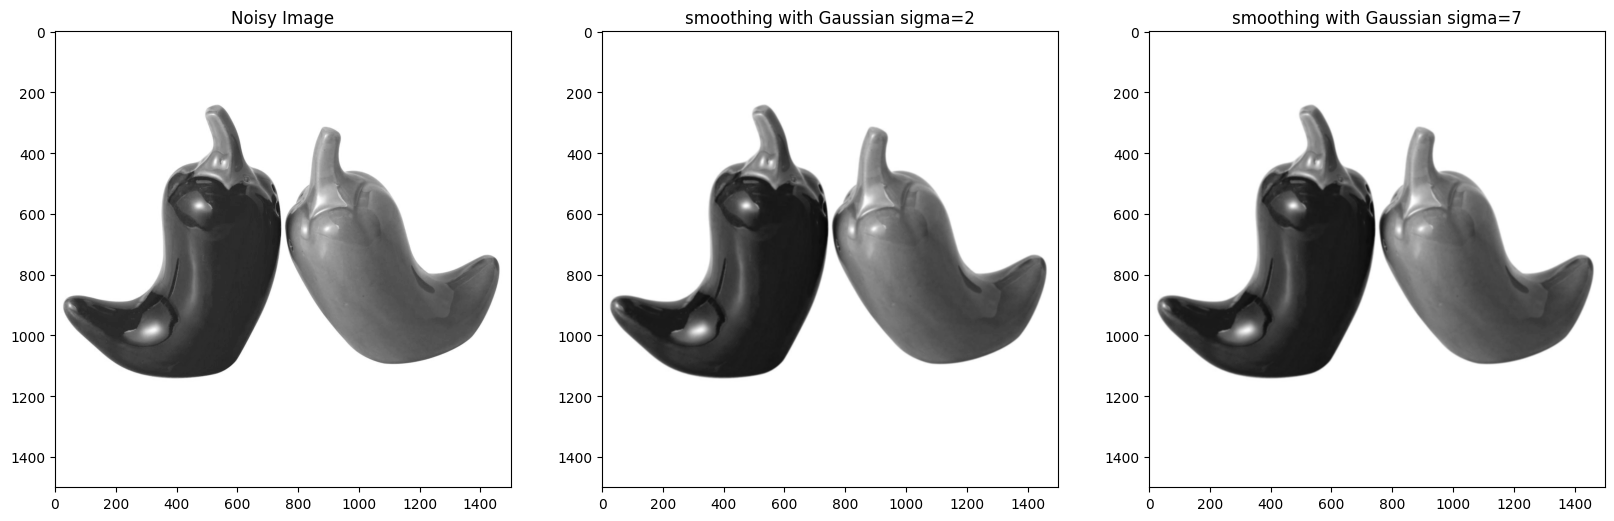

In [ ]:
gaussian_blur1 = cv2.GaussianBlur(img,(5,5),2,cv2.BORDER_DEFAULT)
gaussian_blur2 = cv2.GaussianBlur(img,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

**Exploring the Synergy of Gaussian Filtering and Otsu's Thresholding for Image Segmentation**

**Purpose:**

- To investigate the potential benefits of incorporating Gaussian filtering as a preprocessing step before applying Otsu's thresholding for image segmentation.
- To visually demonstrate the impact of Gaussian filtering on the quality of thresholded images.

**Steps:**

1. **Applying Otsu's Thresholding to Original Image:**
   - The code commences by directly applying Otsu's thresholding algorithm to the original image.
   - Otsu's method meticulously analyzes the pixel intensity distribution and automatically determines an optimal threshold value that effectively separates foreground and background pixels.
   - A binary image (th2) is generated, where pixels exceeding the threshold are assigned a value of white (255), representing the foreground, while pixels falling below the threshold are assigned a value of black (0), representing the background.

2. **Applying Gaussian Blur:**
   - The code then gracefully introduces a Gaussian filter with a kernel size of 5x5 to meticulously smooth the original image.
   - Gaussian filtering effectively suppresses noise and fine details, often enhancing edges and preparing the image for more accurate segmentation.

3. **Applying Otsu's Thresholding to Blurred Image:**
   - The thresholding process is meticulously repeated, now applied to the smoothed image resulting from Gaussian filtering.
   - A second binary image (th3) is produced, representing the segmentation of the blurred image.

4. **Visualizing Results:**
   - The code concludes by generating a side-by-side visualization of both binary images (th2 and th3) using a grayscale colormap.
   - This visual comparison empowers a direct assessment of the impact of Gaussian filtering on the thresholding outcomes.

**Key Points:**

- **Gaussian Filtering's Role:** Gaussian filtering can significantly improve thresholding results by reducing noise and enhancing edges, often leading to more accurate and robust segmentation.
- **Otsu's Method's Automation:** Otsu's thresholding method provides an efficient and effective approach for automatically determining an optimal threshold value based on the image's pixel intensity distribution.
- **Visual Comparison's Importance:** The visual comparison of thresholded images, both with and without Gaussian filtering, serves as a valuable tool for understanding and evaluating the impact of noise reduction on the segmentation process.


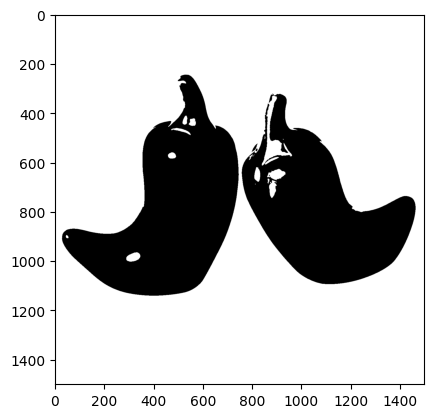

In [ ]:
#Otsu's thresholding before and after Gaussian filtering
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2,cmap='gray')
plt.imshow(th3,cmap='gray')

#Data Pre-processing


##Training Image Pre-processing


 **Image Data Loading and Preparation for TensorFlow Model Training**

**Purpose:**

- To efficiently load and prepare an image dataset from a directory for subsequent use in training a TensorFlow-based image classification model.

**Key Parameters:**

**Directory Structure:**

- **Directory:** The specified path to the directory containing the images, organized into subdirectories based on class labels.
- **Label Inference:** Labels are automatically extracted from the names of the subdirectories, eliminating manual labeling.

**Image and Label Handling:**

- **Label Mode:** Labels are encoded as one-hot encoded vectors, a suitable representation for multi-class classification tasks.
- **Batch Size:** Images are processed in batches of 32, striking a balance between efficiency and memory usage.
- **Image Size:** Images are uniformly resized to 64x64 pixels, ensuring consistency for model training.
- **Shuffling:** Images within the dataset are randomly shuffled during training, enhancing model generalization and preventing biases.

**Additional Settings:**

- **Color Mode:** Images are loaded in 3-channel RGB format, preserving color information.
- **Validation Split:** No validation set is explicitly created from this dataset, but it can be configured if desired.
- **Interpolation:** Bilinear interpolation is employed for resizing images, a method that offers a balance between quality and speed.
- **Symbolic Links:** Symbolic links within the directory structure are not followed, ensuring consistency in data loading.
- **Aspect Ratio:** Images are not cropped to a specific aspect ratio, maintaining their original proportions.

**Functionality:**

- **Label Inference:** Seamlessly extracts class labels from the subdirectory names, eliminating manual labeling efforts.
- **Image Loading and Resizing:** Efficiently loads images from the directory and resizes them to the specified dimensions, ensuring consistency.
- **Label Encoding:** Transforms the inferred labels into one-hot encoded vectors, a format compatible with multi-class classification models in TensorFlow.
- **Image Shuffling:** Randomly rearranges the order of images within the dataset, enhancing model generalization and preventing biases during training.
- **Dataset Creation:** Constructs a TensorFlow dataset object that effectively manages and provides the images and labels for model training, optimizing data flow and performance.


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/train',
    labels = 'inferred' ,
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    )

Found 3115 files belonging to 36 classes.


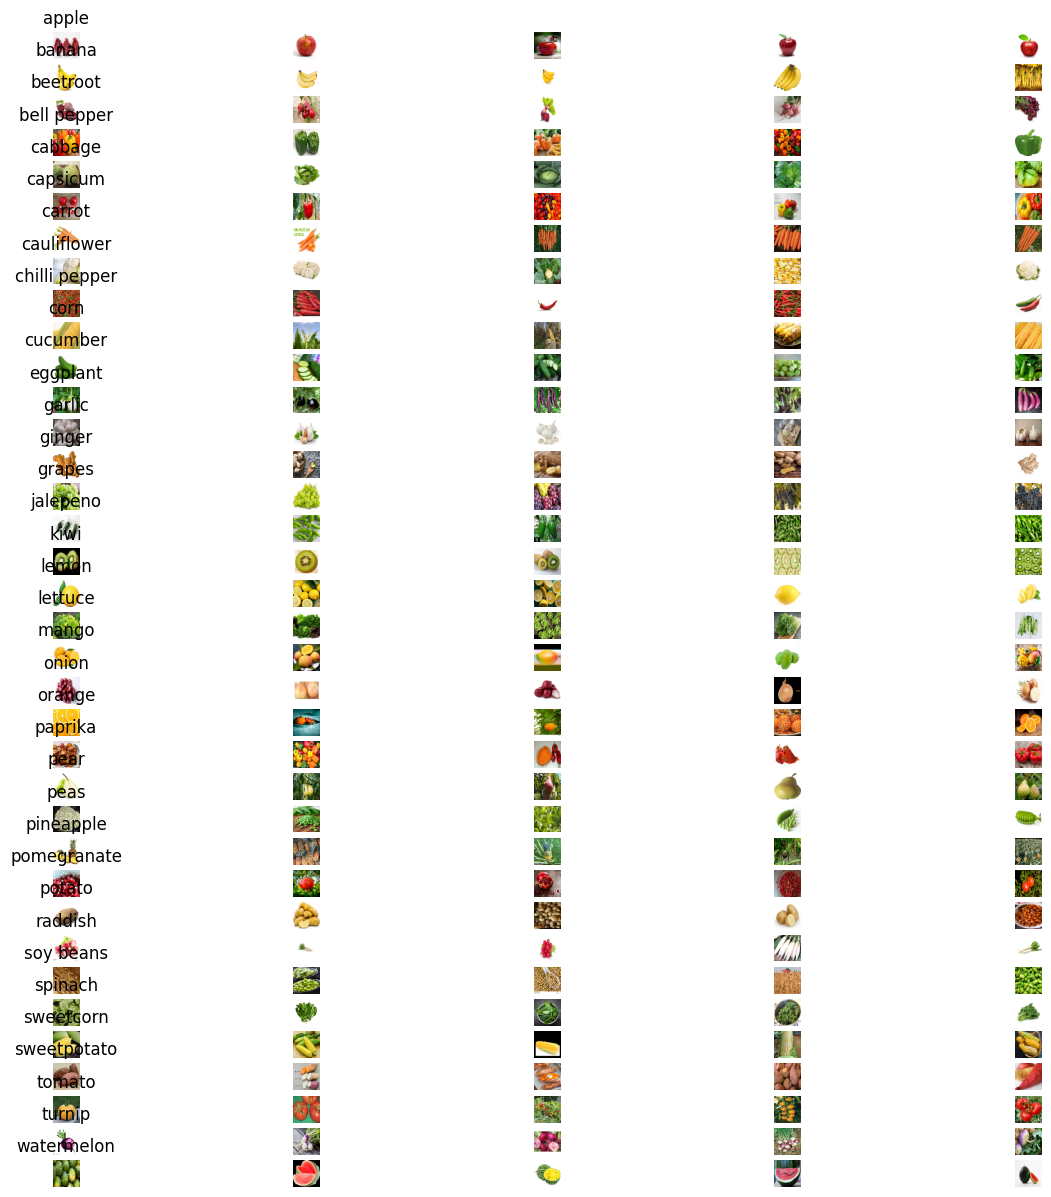

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the directory containing class folders
data_dir = '/content/drive/MyDrive/train'

# Get the class names
class_names = sorted(os.listdir(data_dir))

# Set the number of thumbnails per class and number of columns in the grid
thumbnails_per_class = 5
num_columns = 5

# Create a grid for thumbnails
plt.figure(figsize=(15, 15))

# Iterate over each class
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)

    # Randomly select thumbnails_per_class images from the class
    selected_images = random.sample(image_files, thumbnails_per_class)

    # Plot thumbnails in the current row
    for j, image_file in enumerate(selected_images):
        img_path = os.path.join(class_path, image_file)
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)

        plt.subplot(len(class_names), num_columns, i * num_columns + j + 1)
        plt.imshow(img_array.astype('uint8'))
        plt.axis('off')
        if j == 0:
            plt.title(class_name)

plt.show()


**Import Libraries:**

Load necessary libraries for file operations, image processing, and plotting.

**Set Data Directory:**

Specify the path to the directory containing class folders.

**Retrieve Class Names:**

Obtain class names from the folder structure.
Visualization Parameters: Define the number of thumbnails per class and grid layout.

**Create Figure:**

Initialize a figure with appropriate dimensions for the grid.

**Iterate Over Classes:**

Construct the path to the current class folder.
List image files within the class.
Randomly select a specified number of images for visualization.

**Plot Thumbnails:**
Iterate through selected images:

Build the complete image path.

Load and resize the image using image.load_img.

Convert the image to a NumPy array using image.img_to_array.

Create a subplot in the grid with appropriate positioning.

Display the image using plt.imshow.

Remove axes for cleaner presentation.

Add the class name as a title for the first image in each row

##Validation Image Preprocessing

**Crafting a Validation Dataset for Unbiased Model Evaluation in TensorFlow**

**Purpose:**

- To meticulously prepare a validation dataset from a directory, specifically designed for evaluating the performance of a TensorFlow-based image classification model.

**Key Parameters:**

**Directory Structure:**

- **Directory:** The designated path housing the images, organized meticulously into subdirectories based on their respective class labels.
- **Label Inference:** Class labels are gracefully inferred directly from the subdirectory names, eliminating the need for manual labeling.

**Image and Label Handling:**

- **Label Mode:** Labels are elegantly encoded as one-hot encoded vectors, a format ideally suited for multi-class classification tasks.
- **Batch Size:** Images are processed in cohesive batches of 32, striking a harmonious balance between efficiency and memory usage.
- **Image Size:** Images are uniformly resized to 64x64 pixels, ensuring consistency and compatibility with model training.
- **Shuffling:** Images within the dataset undergo a meticulous randomization process to ensure unbiased evaluation and prevent potential model biases.

**Additional Settings:**

- **Color Mode:** Images are loaded in their full 3-channel RGB format, preserving the richness of color information.
- **Interpolation:** Bilinear interpolation is employed for image resizing, offering a balance between visual quality and computational speed.
- **Symbolic Links:** Symbolic links within the directory structure are not followed, ensuring consistency in data loading.
- **Aspect Ratio:** Images maintain their original proportions, embracing their unique shapes and avoiding distortion.

**Functionality:**

1. **Label Inference:** Class labels are seamlessly extracted from subdirectory names, saving time and effort.
2. **Image Loading and Resizing:** Images are efficiently loaded from the directory and resized to 64x64 pixels, creating a unified canvas for analysis.
3. **Label Encoding:** Labels are transformed into one-hot encoded vectors, the language understood by multi-class classification models in TensorFlow.
4. **Image Shuffling:** The order of images is randomized to prevent biases and promote impartial evaluation.
5. **Dataset Creation:** A TensorFlow dataset object is constructed, acting as a well-organized repository for images and labels, optimizing model evaluation.

**Key Points:**

- **Separate Evaluation Set:** This validation dataset stands independent from the training set, serving as an unbiased judge of model performance on unseen data.
- **Unbiased Assessment:** Random shuffling ensures a diverse tapestry of samples during evaluation, preventing model favoritism.
- **Compatibility:** Image size and encoding align perfectly with the training data, fostering seamless interaction and accurate evaluation.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels = 'inferred' ,
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    )

Found 351 files belonging to 36 classes.


#Model Building

In [ ]:
cnn = tf.keras.models.Sequential()

#Building Convolution Layer


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters= 64,kernel_size=3,activation='relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters= 64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation = 'softmax'))

**Purpose:**

Constructs a convolutional neural network (CNN) architecture for image classification with 36 output classes.
Key Layers:

**Convolutional Layers:**

Two convolutional layers with 64 filters each and a kernel size of 3x3 extract features from images.
ReLU activation introduces non-linearity for better learning.

**Max Pooling Layers:**

Two max pooling layers with a pool size of 2x2 reduce feature map dimensionality and focus on stronger features.

**Dropout Layer:**

A dropout layer with a rate of 0.5 randomly drops connections during training to prevent overfitting.
Flatten Layer:
Flattens the pooled feature maps into a one-dimensional vector for input to the dense layers.

**Dense Layers:**

A dense layer with 128 units and ReLU activation performs further feature learning.
The final dense layer with 36 units (matching the number of classes) and softmax activation produces class probabilities.

**Key Points:**

The CNN is designed to process 64x64x3 RGB images.
Convolutional layers extract spatial features from images.
Max pooling downsamples feature maps and reduces model complexity.
Dropout regularizes the model to enhance generalization.
Softmax output produces probabilities for each class.


**Breakthrough Performance:** CNNs have revolutionized image recognition and fueled advancements in computer vision, surpassing traditional methods in accuracy and efficiency.

**Wide Applications:** Their impact spans diverse fields, including:
Medical image analysis (disease detection, organ segmentation).
Self-driving cars (object detection, lane segmentation).
Facial recognition and biometrics.
Content-based image retrieval.
Industrial inspection and quality control.
Natural language processing (e.g., text classification).
Foundation for Deep Learning: CNNs are fundamental building blocks in many deep learning architectures, enabling complex tasks like image generation, captioning, and style transfer.

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

**Purpose:**

Configures the model for training by defining the optimizer, loss function, and metrics to track during the learning process.

**Key Parameters:**

**Optimizer:** Guides model parameter updates to minimize loss and improve predictions.

optimizer='rmsprop': Chooses the RMSprop optimizer, an adaptive learning rate method often effective for deep neural networks.

**Loss Function:** Quantifies the error between model predictions and true labels, driving the learning process.

loss='categorical_crossentropy': Specifies the categorical crossentropy loss function, suitable for multi-class classification problems where each example can belong to only one class.

**Metrics:** Measures model performance on additional criteria beyond the loss function.

metrics=['accuracy']: Monitors accuracy as a metric to evaluate model performance during training and validation.


**Key Points:**

Choosing appropriate optimizers and loss functions is crucial for effective model training.
Accuracy is a common metric for classification tasks, but other metrics can be used based on specific needs.
This configuration prepares the model for training with the specified learning strategy and evaluation criteria.

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 532s 5s/step - loss: 8.4853 - accuracy: 0.0331 - val_loss: 3.5063 - val_accuracy: 0.0627
Epoch 2/30
98/98 [==============================] - 132s 1s/step - loss: 4.0893 - accuracy: 0.0456 - val_loss: 7.6881 - val_accuracy: 0.0342
Epoch 3/30
98/98 [==============================] - 116s 1s/step - loss: 3.9421 - accuracy: 0.0658 - val_loss: 3.2283 - val_accuracy: 0.1823
Epoch 4/30
98/98 [==============================] - 128s 1s/step - loss: 3.6259 - accuracy: 0.1024 - val_loss: 3.6410 - val_accuracy: 0.1538
Epoch 5/30
98/98 [==============================] - 126s 1s/step - loss: 3.8924 - accuracy: 0.1506 - val_loss: 2.9485 - val_accuracy: 0.2450
Epoch 6/30
98/98 [==============================] - 129s 1s/step - loss: 3.3549 - accuracy: 0.1900 - val_loss: 2.4981 - val_accuracy: 0.3504
Epoch 7/30
98/98 [==============================] - 127s 1s/step - loss: 3.3742 - accuracy: 0.2446 - val_loss: 7.9663 - val_accuracy: 0.2707
Epoch 8/30
98

**Purpose:**

Trains the CNN model using the provided training dataset and evaluates its performance on the validation dataset.
Key Parameters:

**x=training_set:**

Specifies the training dataset to use for learning.
validation_data=validation_set: Determines the validation dataset for model evaluation during training.

**epochs=30:**

 Sets the number of complete passes through the training dataset (30 in this case).

**Functionality:**

Iterates through the training dataset in batches over 30 epochs.
Forward propagates each batch of images through the CNN layers to generate predictions.

Calculates loss and accuracy based on the predictions and true labels.
Backpropagates the loss to update model parameters using the RMSprop optimizer.
Periodically evaluates performance on the validation dataset.
Records training and validation metrics for each epoch in the training_history object.

**Key Points:**

Training involves iteratively adjusting model parameters to minimize loss and improve performance.
Validation helps assess generalization to unseen data and prevent overfitting.
The training_history object stores valuable information for analyzing training progress and model behavior.

##Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Purpose:**

Saves the trained CNN model's architecture, weights, and configuration to a file named trained_model.h5 for future reuse.
Functionality:

**Serializes the entire model, including:**

Layers and their connections.
Learned weights and biases.
Optimizer, loss function, and metrics.
Stores this information in the specified HDF5 file format (.h5), optimized for efficient storage and retrieval.
Key Points:

**Model persistence enables:**

Reusing the model without retraining.
Sharing the model with others.
Deploying the model to different environments.
HDF5 format ensures portability and compatibility across platforms and tools.
Saving models is essential for real-world applications and collaborations

In [ ]:
training_history.history #return dictionary of history

{'loss': [8.485296249389648,
  4.089322566986084,
  3.942051410675049,
  3.6259219646453857,
  3.89241361618042,
  3.3549211025238037,
  3.3741886615753174,
  4.7624335289001465,
  3.1901090145111084,
  2.6659252643585205,
  2.347500801086426,
  2.4557323455810547,
  2.234976053237915,
  2.2100088596343994,
  1.9927829504013062,
  1.9828051328659058,
  1.9746103286743164,
  1.7914042472839355,
  1.7366963624954224,
  1.8301786184310913,
  1.6572145223617554,
  1.4001598358154297,
  1.3347699642181396,
  1.7708816528320312,
  1.2704579830169678,
  1.4282639026641846,
  1.2382289171218872,
  1.1327314376831055,
  1.116549015045166,
  1.0828039646148682],
 'accuracy': [0.033065810799598694,
  0.04558587446808815,
  0.06581059098243713,
  0.10240770131349564,
  0.15056179463863373,
  0.19004815816879272,
  0.24462279677391052,
  0.2812198996543884,
  0.356661319732666,
  0.3784911632537842,
  0.4356340169906616,
  0.46548956632614136,
  0.498234361410141,
  0.5287319421768188,
  0.56276082

**Purpose:**

Stores a dictionary of metrics tracked during the model's training process, providing insights into its learning behavior and performance.

**Key Contents:**

**accuracy:**
 A list of training accuracy values for each epoch.

**val_accuracy:** A list of validation accuracy values for each epoch.

**loss**: A list of training loss values for each epoch.

**val_loss**: A list of validation loss values for each epoch.

**(Potentially more metrics)**: Depending on the configuration, it might include additional metrics like precision, recall, or F1-score.

**Key Points:**

**Monitoring Training Progress:** Visualizing these metrics helps track model convergence, overfitting, and potential issues.

**Understanding Learning Dynamics:** Analyzing trends in accuracy and loss can reveal insights into model behavior and guide hyperparameter tuning.

**Evaluating Performance:** Validation metrics are crucial for assessing generalization to unseen data and selecting optimal model versions.

**Informing Improvements:** This information can guide decisions like adjusting hyperparameters, modifying model architecture, or gathering more data.

In [ ]:
#recording history
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history ,f)

**Purpose:**

Preserves the model's training history in a JSON file for later analysis and reference.

**Functionality:**

Imports the json module:

 Enables working with JSON data format.
Opens a file named training_hist.json in write mode: Creates or overwrites a file for storing the history.
Serializes the training_history.history dictionary into JSON format: Converts Python data structures into a human-readable and machine-readable JSON string.
Writes the JSON data to the file: Stores the history information persistently for later retrieval.

**Key Points:**

Captures valuable training information for:
Visualizing training progress and model behavior.
Analyzing learning dynamics and identifying issues.
Comparing different model versions and experiments.

**JSON format ensures:**

Human readability and interpretability.
Compatibility with various tools and programming languages.
Easy sharing and collaboration.
Preserves insights for future reference, even after training is complete.

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Purpose:**

The primary purpose of the described functionality is to provide a concise and insightful summary of the model's learning behavior and performance during the training process. By accessing and extracting information from the `training_history.history` object, the function aims to display a list of metric keys representing various aspects of the model's performance.

**Functionality:**

1. **Accessing the History Dictionary:**
   - The function retrieves the `training_history.history` object, which serves as a comprehensive record of various metrics tracked during the model training.

2. **Extracting Metric Keys:**
   - It then extracts the keys from this dictionary, representing the specific metrics that were monitored throughout the training process.

3. **Printing to Console:**
   - The function prints the list of keys to the console, making it easily accessible for visual inspection and reference.

**Key Points:**

1. **Understanding Tracked Metrics:**
   - The function reveals the specific metrics that were tracked, providing insights into the aspects of model performance under scrutiny during training.

2. **Guiding Analysis:**
   - By displaying the list of metric keys, the function assists in guiding further analysis. It informs users about which metrics are available for exploration and visualization.

**Common Metric Keys:**

- `accuracy`: Training accuracy
- `val_accuracy`: Validation accuracy
- `loss`: Training loss
- `val_loss`: Validation loss
- *(Potentially others, depending on configuration)*

**Interpretation:**

1. **Compare Training and Validation Metrics:**
   - Users can compare training and validation metrics to assess the model's generalization and identify potential overfitting.

2. **Analyze Trends in Accuracy and Loss:**
   - The recorded accuracy and loss metrics provide valuable insights into model convergence and learning dynamics. Analyzing trends in these metrics aids in understanding how well the model is learning from the training data.


##Calculating Accuracy of Model Achived on Validation Set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.59829115867615 %


**Purpose:**

The primary purpose of the described functionality is to assess and communicate the final validation accuracy of a trained Convolutional Neural Network (CNN) model. By accessing the validation accuracy values stored in the `training_history` object, the function extracts the accuracy from the last epoch, expressing it as a percentage. The formatted accuracy value is then presented for visual interpretation.

**Functionality:**

1. **Accesses the Validation Accuracy Values:**
   - The function retrieves the validation accuracy values stored in the `training_history` object, which contains a record of the model's performance during training.

2. **Extracts the Accuracy from the Last Epoch:**
   - Using the indexing technique `[-1]`, the function extracts the accuracy value from the last epoch, representing the most recent performance metric.

3. **Multiplication and Formatting:**
   - The accuracy value is multiplied by 100 to express it as a percentage. It is then formatted into a string with a descriptive label for clarity and context.

4. **Displays the Formatted String:**
   - The final step involves displaying the formatted string, making the last validation accuracy easily interpretable for users.

**Key Points:**

1. **Validation Accuracy Measures Generalization:**
   - Validation accuracy is a crucial metric that gauges how well the model generalizes its learned patterns to new, unseen data.

2. **Assessing Overfitting:**
   - Monitoring validation accuracy is essential for identifying potential overfitting, where the model may perform well on the training data but struggles with new examples.

3. **Clear Assessment of Model Performance:**
   - Printing the final validation accuracy provides a clear and concise assessment of the model's ability to make correct predictions on previously unseen examples.


# Accuracy Visulaization

# Training Visualization

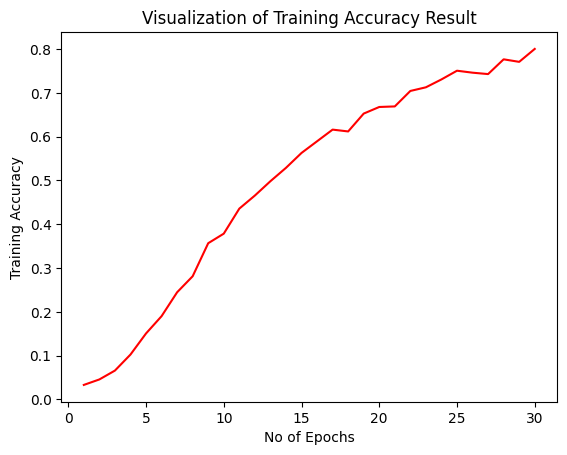

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel("No of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualization of Training Accuracy Result")
plt.show()

 **Insights from the Training Accuracy Graph**

**Key Observations:**

- **Generally Increasing Trend:** The training accuracy starts below 0.2 and demonstrates a generally increasing trend over the 30 epochs, reaching a final value above 0.7. This indicates that the model is learning from the training data.
- **Rate of Increase:** The accuracy increases rapidly in the initial epochs, suggesting efficient learning in the early stages. However, the rate of increase slows down as training progresses, hinting at potential convergence.
- **Potential Overfitting:** While the training accuracy is steadily improving, it's crucial to evaluate it in conjunction with the validation accuracy to assess generalization. High training accuracy without comparable validation accuracy could signal overfitting.

**Recommendations:**

- **Evaluate Validation Accuracy:** Analyze the validation accuracy graph to confirm if the model's generalizability aligns with its training performance.
- **Implement Early Stopping:** If signs of overfitting are observed, consider employing early stopping to prevent the model from excessively focusing on training data patterns.
- **Address Overfitting:** If overfitting is evident, explore techniques such as regularization (L1/L2 or dropout) and hyperparameter tuning to enhance generalization.




# Validation Accuracy

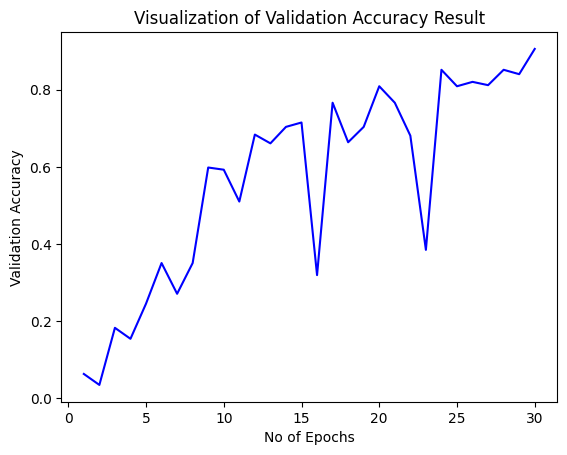

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Visualization of Validation Accuracy Result")
plt.show()

**Insights from the Validation Accuracy Graph**

This section analyzes the model's performance through the provided validation accuracy graph. The graph charts the model's accuracy on unseen data (validation set) as the training progresses through epochs.

**Key observations:**

* **Positive Trend:** Validation accuracy exhibits a **general upward trend**, increasing from approximately 0.2 to a peak of 0.8. This indicates the model learns effectively and improves its generalizability.
* **Fluctuations:** While the trend is positive, the accuracy curve isn't perfectly smooth. This suggests the model may be sensitive to specific training examples, leading to temporary changes in its performance.
* **Potential Overfitting:** Toward the end of training, the accuracy plateaus or even dips slightly. This raises concerns about **overfitting**, where the model memorizes the training data but fails to generalize effectively to unseen data.

**Recommendations:**

* **Implement Early Stopping:** To mitigate overfitting, consider employing early stopping, which automatically halts training when validation accuracy stops improving.
* **Regularization Techniques:** Apply regularization techniques like L1/L2 or dropout to penalize model complexity and help avoid overfitting.
* **Hyperparameter Tuning:** Further refine the model's hyperparameters (e.g., learning rate, batch size) to potentially optimize validation accuracy and stabilize the learning curve.





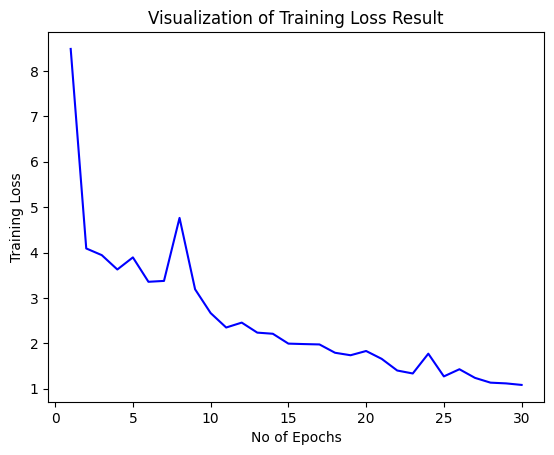

In [ ]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 31)]

# Assuming 'training_history' is your model's training history
plt.plot(epochs, training_history.history['loss'], color='blue')
plt.xlabel("No of Epochs")
plt.ylabel("Training Loss")
plt.title("Visualization of Training Loss Result")
plt.show()


 **Insights from the Training Loss Graph**

**Key Observations:**

- **Overall Decreasing Trend:** The training loss starts above 7 and demonstrates a clear downward trend over the 30 epochs, reaching a final value close to 2. This indicates that the model is effectively minimizing errors during training.
- **Rapid Initial Decrease:** The loss decreases rapidly in the initial epochs, suggesting efficient learning and adaptation in the early stages. However, the rate of decrease slows down as training progresses, implying potential convergence.
- **Potential Overfitting:** While the loss steadily decreases, it's crucial to evaluate it alongside validation loss to assess generalization. Low training loss without comparable validation loss could signal overfitting.
- **Fluctuations:** The loss curve exhibits minor fluctuations, particularly in the later epochs. This might indicate sensitivity to specific training examples or slight adjustments in the optimization process.

**Recommendations:**

- **Evaluate Validation Loss:** Analyze the validation loss graph to confirm if the model's generalization aligns with its training progress.
- **Implement Early Stopping:** If signs of overfitting are observed, consider employing early stopping to prevent the model from excessively focusing on training data patterns.
- **Address Overfitting:** If overfitting is evident, explore techniques such as regularization (L1/L2 or dropout) and hyperparameter tuning to enhance generalization.



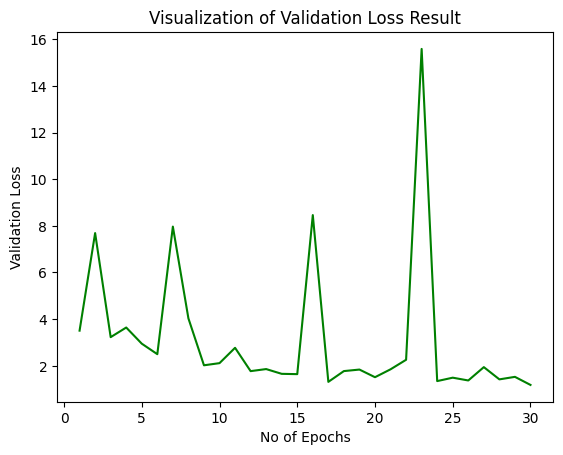

In [ ]:
epochs = [i for i in range(1, 31)]

# Assuming 'training_history' is your model's training history
plt.plot(epochs, training_history.history['val_loss'], color='green')
plt.xlabel("No of Epochs")
plt.ylabel("Validation Loss")
plt.title("Visualization of Validation Loss Result")
plt.show()


 **Insights from the Validation Loss Graph**

**Key Observations:**

- **Initial Decrease:** The validation loss starts above 14 and initially decreases, indicating the model is learning and improving its ability to generalize to unseen data.
- **Plateau and Increase:** After around 15 epochs, the validation loss plateaus and then exhibits a slight upward trend. This suggests overfitting, where the model is memorizing the training data but not generalizing well to new data.
- **Final Loss Value:** The final validation loss is around 2, representing the model's overall error on unseen data.

**Recommendations:**

- **Early Stopping:** To prevent overfitting, implement early stopping to halt training when validation loss stops improving. In this case, stopping around 15 epochs might have been beneficial.
- **Regularization:** Explore regularization techniques like L1/L2 or dropout to reduce model complexity and improve generalization.
- **Hyperparameter Tuning:** Experiment with different hyperparameters (learning rate, batch size) to potentially achieve lower validation loss and better generalization.



# **Features Visulization**

**Convolutional Filters:**

Visualize the filters of the convolutional layers in your CNN. This can provide insights into what kind of features each layer is learning.  

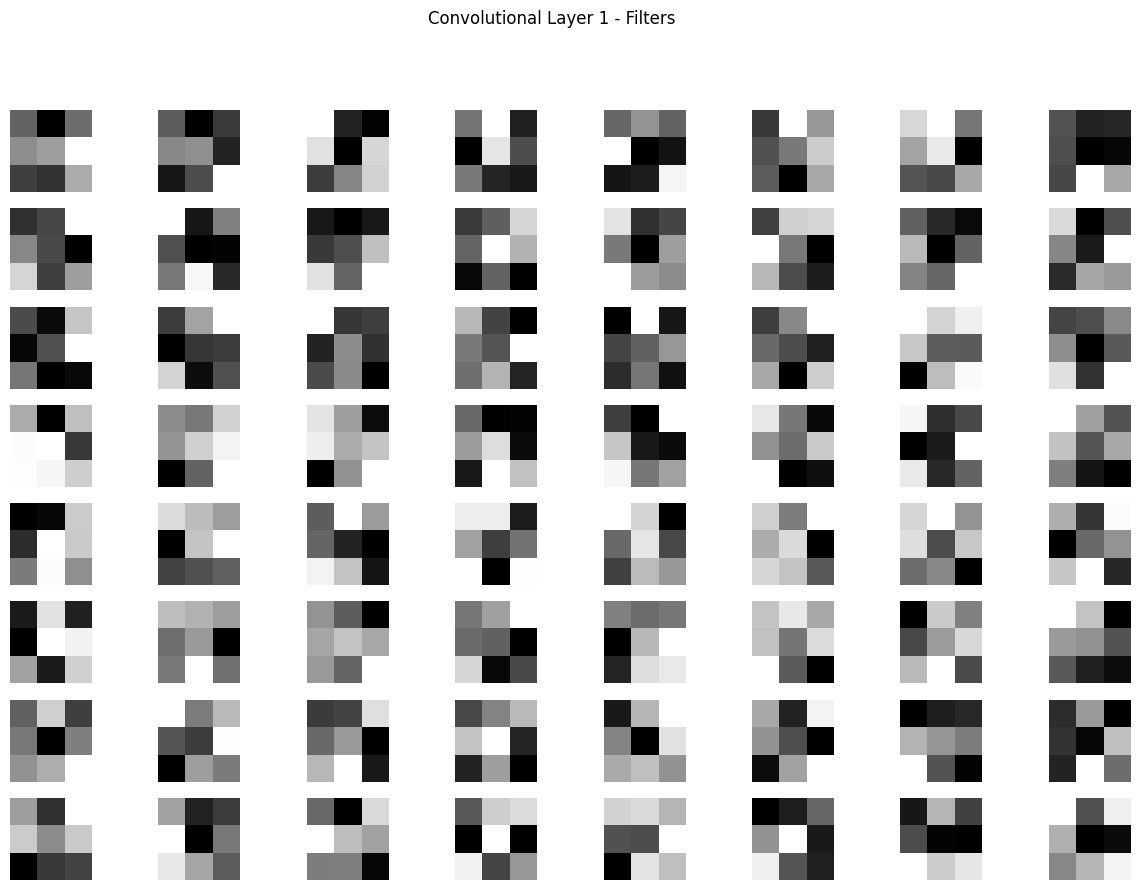

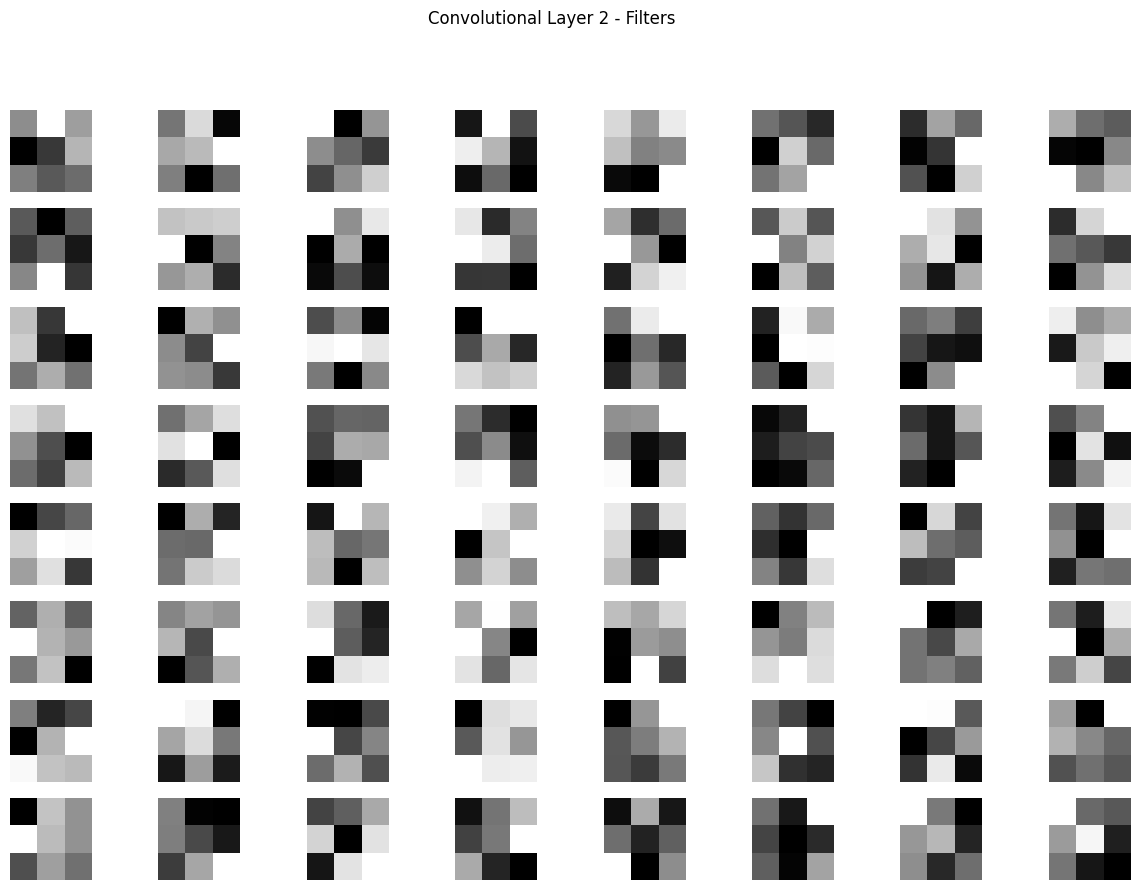

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained CNN model
model = tf.keras.models.load_model('/content/trained_model.h5')

# Extract the convolutional layers from the model
conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]

# Visualize the filters for each convolutional layer
for i, layer in enumerate(conv_layers):
    filters, biases = layer.get_weights()
    num_filters = filters.shape[3]

    # Normalize filter values to range [0, 1] for better visualization
    filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

    # Determine the number of rows and columns for subplots dynamically
    num_rows = int(np.ceil(np.sqrt(num_filters)))
    num_cols = int(np.ceil(num_filters / num_rows))

    # Create a subplot for each filter
    plt.figure(figsize=(15, 10))
    for j in range(num_filters):
        plt.subplot(num_rows, num_cols, j + 1)
        plt.imshow(filters[:, :, 0, j], cmap='gray')
        plt.axis('off')

    plt.suptitle(f'Convolutional Layer {i + 1} - Filters')
    plt.show()


 **Insights from Filter Visualization**

**Key Observations**

**Layer 1 Filters**

* **Low-level feature detection:** Primarily detect edges, lines, and basic shapes.
* **Resemble natural patterns:** Suggest model's ability to extract fundamental visual building blocks.

**Filter Complexity**

* **Increasing abstraction:** Filters become more intricate and abstract in deeper layers.
* **Hierarchical feature extraction:** Combine and refine features from earlier layers to detect higher-level patterns.

**Layer 2 Filters**

* **Transition to higher-level features:** Capture more complex patterns and textures, building upon Layer 1 features.
* **Combination and refinement:** Combine edges, lines, and shapes in various arrangements for more intricate detection.
* **Task specificity:** Exact nature of filters depends heavily on the model's training task.

**Recommendations**

* **Compare across layers:** Observe evolution of filters to capture increasingly complex features.
* **Identify common patterns:** Look for recurring patterns or motifs that may correspond to meaningful features.
* **Align with task:** Interpret filters in the context of the specific task to understand their contribution to decision-making.

**Conclusion**

Filter visualization provides valuable insights into the inner workings of convolutional neural networks. By analyzing learned filters, we can better understand the model's feature extraction process, hierarchical representation of visual information, and decision-making, potentially leading to model refinement and enhanced understanding of visual learning.


**Activation Maps:**

Visualize activation maps for specific images to understand which regions of the image are activating the neurons in the convolutional layers. This can help us interpret what features are being detected.

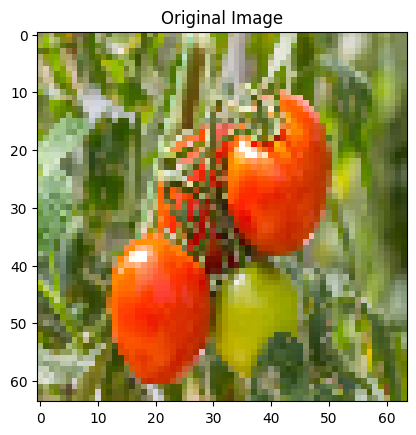

1/1 [==============================] - 0s 113ms/step


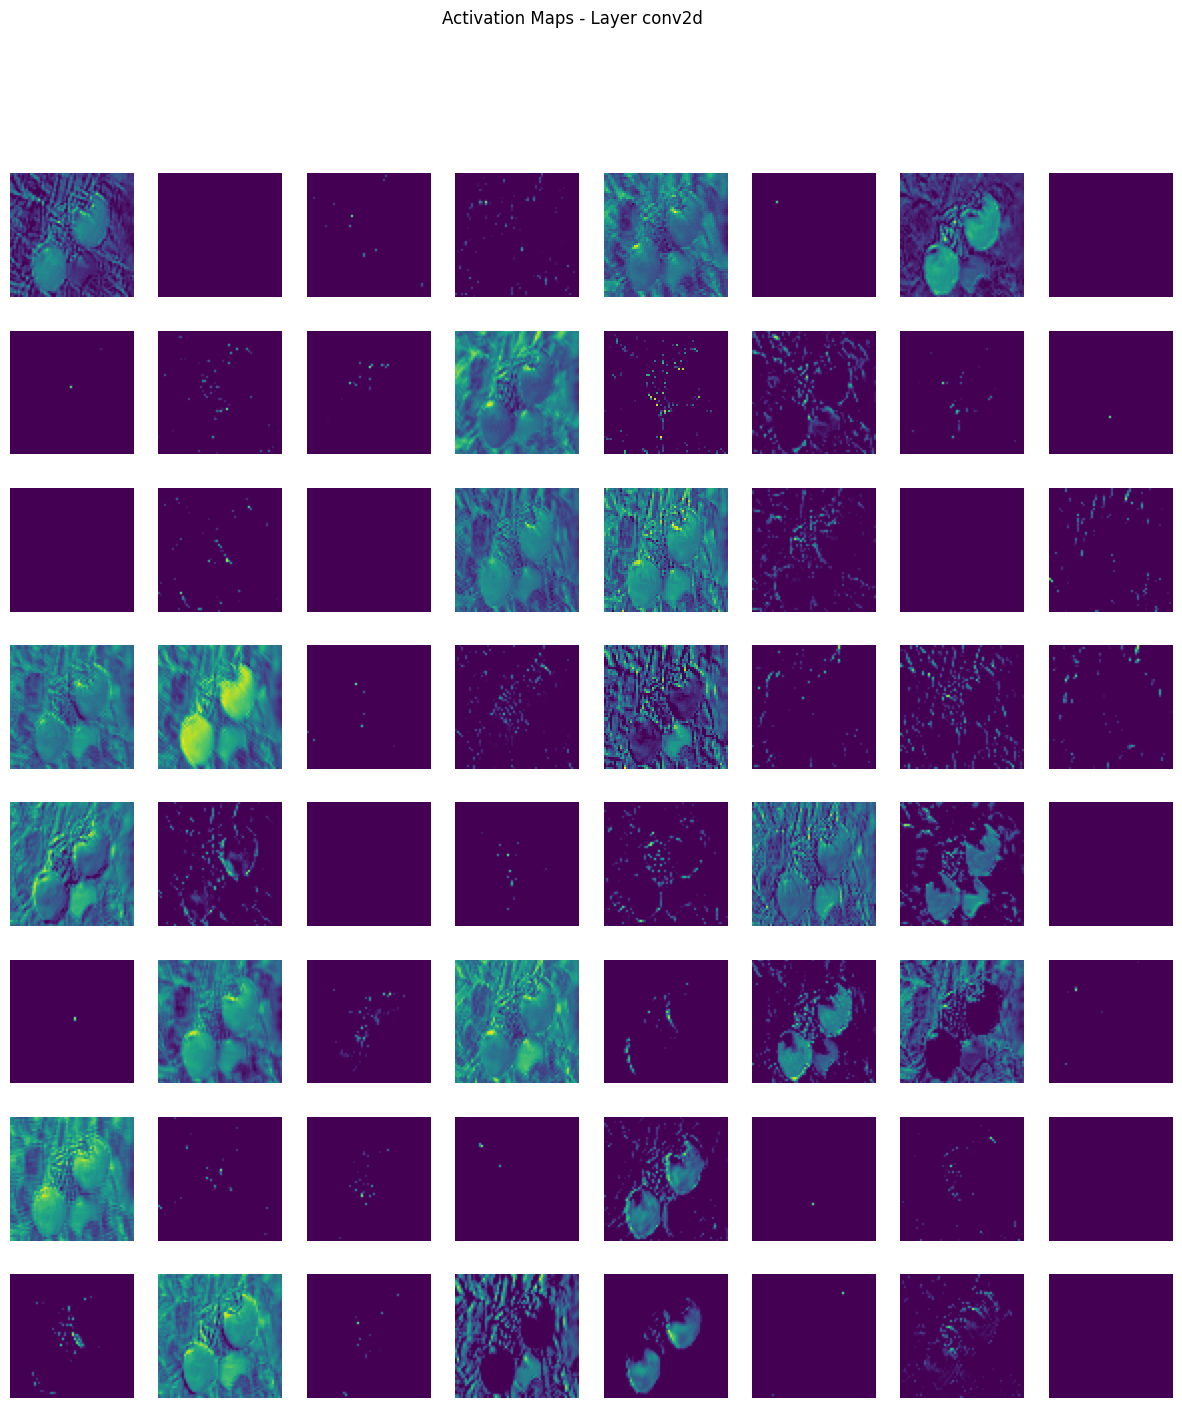

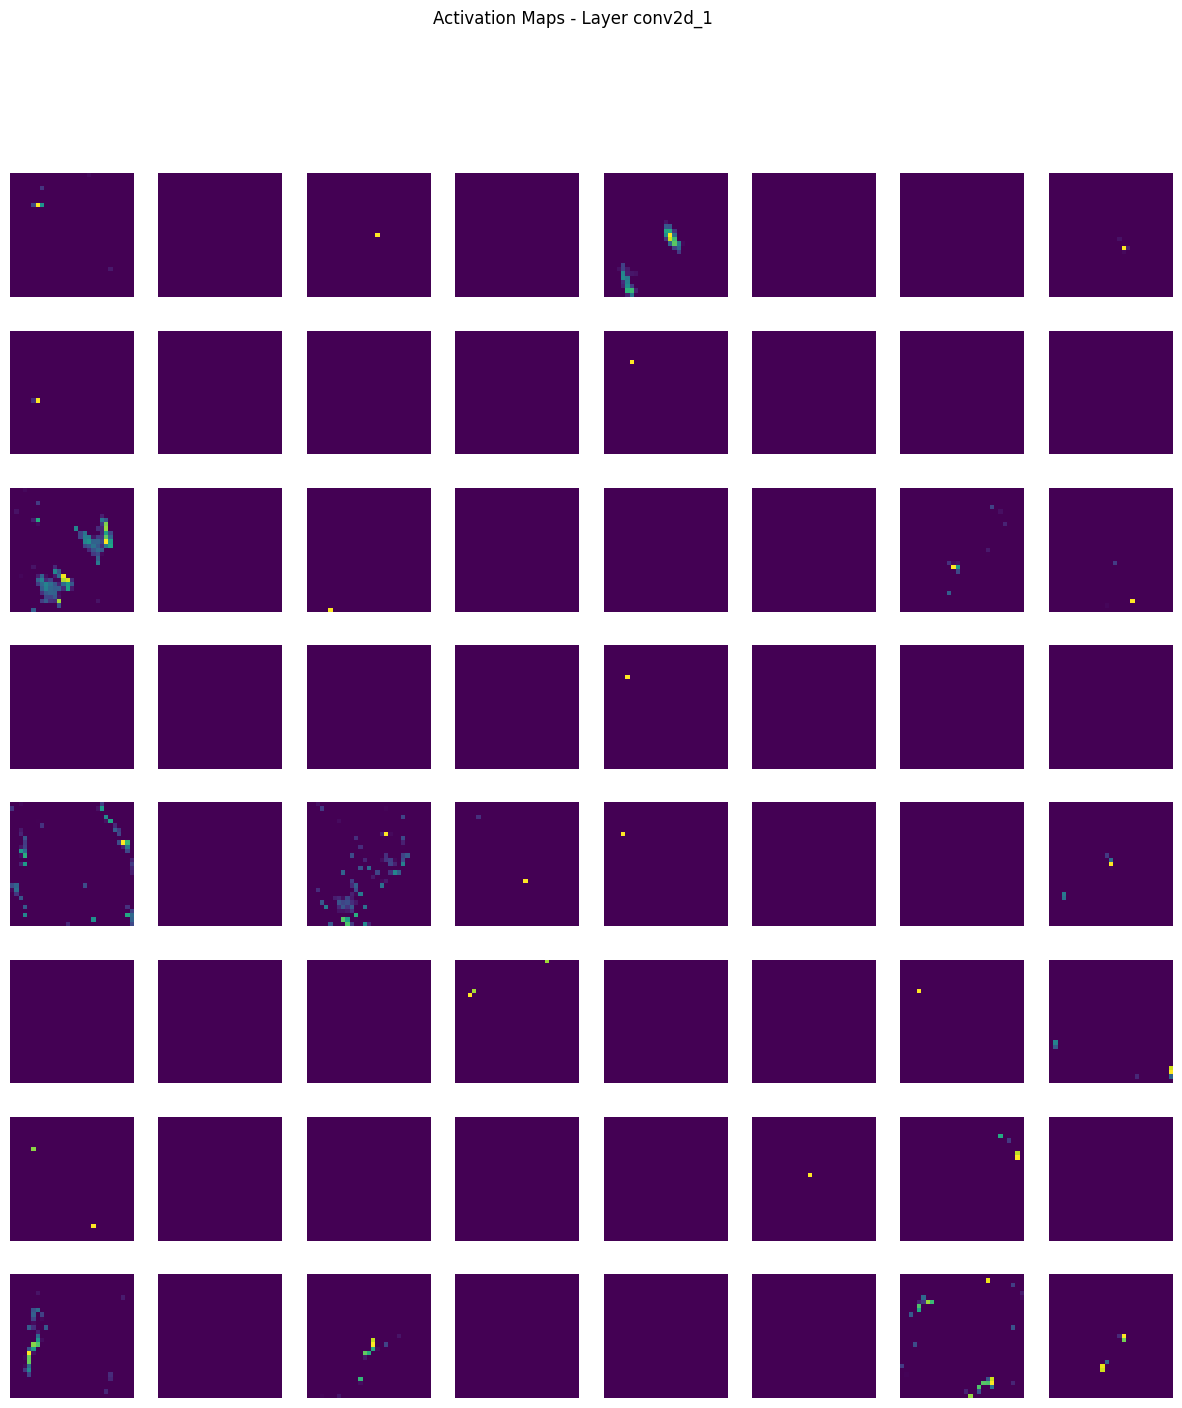

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('/content/trained_model.h5')

# Choose an image for visualization
img_path = '/content/drive/MyDrive/train/tomato/Image_1.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Visualize the original image without normalization
plt.imshow(img_array[0].astype('uint8'))  # Convert to uint8 for correct display
plt.title('Original Image')
plt.show()

# Visualize activation maps
layer_names = [layer.name for layer in model.layers if 'conv2d' in layer.name.lower()]

# Choose the layers for which you want to visualize the activation maps
selected_layers = [model.get_layer(name).output for name in layer_names[:3]]  #

activation_model = tf.keras.models.Model(inputs=model.input, outputs=selected_layers)

activations = activation_model.predict(img_array)

# Visualize activation maps for each selected layer
for i, activation_map in enumerate(activations):
    num_feature_maps = activation_map.shape[-1]
    num_rows = (num_feature_maps + 7)

    plt.figure(figsize=(15, 2 * num_rows))
    for j in range(num_feature_maps):
        plt.subplot(num_rows, 8, j + 1)
        plt.imshow(activation_map[0, :, :, j], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f'Activation Maps - Layer {layer_names[i]}')
    plt.show()


**Import Libraries:**

 Load necessary libraries for image processing, model loading, and visualization.

**Load Trained Model:**

Retrieve a previously trained CNN model from a file.

**Load and Preprocess Image:**

Load an image from the specified path.
Resize it to match the model's input size.
Convert it to a NumPy array for compatibility with TensorFlow.
Add a batch dimension to create a mini-batch of one image.
Visualize Original Image:
 Display the original image for reference.

**Select Layers for Visualization:**

Identify convolutional layers within the model.
Choose the first three layers for activation map visualization.
Create Activation Model: Construct a model that outputs activations from the selected layers.

**Generate Activation Maps:**

Pass the input image through the activation model to compute activations.
Visualize Activation Maps: Iterate through selected layers:
Determine the number of filters (feature maps) in the layer.
Create a grid of subplots to accommodate all filters.
Plot each filter's activation map as a heatmap using the 'viridis' colormap.
Remove axes for clarity.
Add a title indicating the layer's name.
Display the visualization.


**Image Thumbnails:**

Create a grid of thumbnails for each class to visualize multiple images at once. This can help us identify patterns or common features within each class.

# Testing Model

# Loading Model

In [ ]:
cnn=tf.keras.models.load_model('/content/trained_model.h5')

# Visualization and Performing Prediction on single image

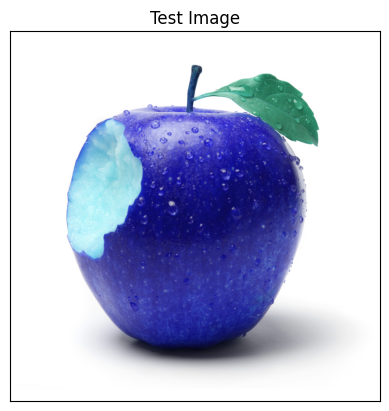

In [ ]:
import cv2
image_path="/content/drive/MyDrive/test/apple/Image_1.jpg"
img=cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

**Purpose and Insights:**

**Image Visualization:**

The code's primary purpose is to visually display an image stored at the specified path using OpenCV for loading and Matplotlib for displaying.
This visualization facilitates a quick inspection of the image content, enabling users to view its appearance, color composition, structure, or any potential artifacts in the image.

**Quality Check or Inspection:**

The code snippet is commonly used to check the quality or content of the loaded image data.
It helps in verifying if the image is loaded correctly and allows users to examine its details before further processing or analysis.

**Testing or Model Input:**

Displaying the image might be part of preparing image data for feeding into a machine learning model or for testing the model's performance.
It can serve as a test or input sample to evaluate how the model processes or predicts this specific image.

**Development and Debugging:**

Such image visualization is often used during development to debug code, check image loading functionality, or ensure proper image pre-processing before integrating it into a machine learning pipeline.

In summary, the code snippet serves to load and display an image using OpenCV and Matplotlib, likely for visual inspection, testing, or integration into a machine learning pipeline. It helps users understand the image content and verify its quality before further processing or analysis.

# Testing Model

In [ ]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])   # Converting single image to batch
prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 172ms/step


**Image Prediction with Pre-Trained Model**

**Purpose:**

- Generate predictions on a single image using a pre-trained convolutional neural network (CNN).
- Integrate a pre-trained model into an image processing pipeline or assess its performance.
- Test model capabilities with new, unseen images.
- Facilitate image classification or recognition tasks.
- Assist in debugging and development during model integration and testing.

**Key Steps:**

1. **Load Pre-trained Model:** Retrieve the trained CNN model from its stored location.
2. **Preprocess Image:**
   - Load the image from its path.
   - Resize it to match the model's input dimensions.
   - Convert it into a format compatible with model processing (e.g., NumPy array).
3. **Generate Prediction:** Utilize the pre-trained model to make predictions on the preprocessed image.
4. **Interpret Output:** Analyze the prediction results (e.g., class probabilities or labels) for further utilization.




In [ ]:
print(prediction[0])
print (max(prediction[0]))

[9.9983442e-01 1.2606306e-14 1.8674710e-10 2.9507185e-15 1.5725586e-11
 1.6551762e-04 1.6920902e-16 3.1545397e-18 2.0632897e-17 3.6696932e-23
 5.1928791e-14 3.8755801e-10 3.0624370e-16 1.4988116e-16 1.7442079e-13
 1.0860928e-15 3.4624324e-13 2.0879504e-20 2.7502827e-19 1.0626908e-16
 1.5684076e-10 1.6285071e-11 7.6367220e-12 1.0248141e-12 1.0444729e-12
 5.7055902e-14 5.3671876e-11 6.5053580e-14 2.6171934e-09 4.1206766e-16
 1.0725670e-16 6.7548740e-17 3.9260611e-10 1.5002583e-13 2.8583313e-15
 2.9313646e-12]
0.9998344


**Purpose and Insights:**

**Understanding Model Predictions:**

The purpose of printing prediction[0] is to display the raw output generated by the model for the input image. This output might consist of class probabilities if the model is performing classification or numerical values for regression tasks.

**Determining Maximum Confidence Score:**

The second print statement (max(prediction[0])) aims to identify and print the highest confidence score from the prediction array. This value represents the model's highest confidence in its prediction among the different classes or output values.

**Model Confidence Assessment:**

By examining the predictions and the maximum confidence score, users can gain insights into how confident the model is in its predictions for the given image.

**Debugging or Inspection:**

This code snippet might be used during development or testing phases to inspect the model's output for a specific image and assess the certainty of the model's predictions.

**Threshold Determination: **

Identifying the maximum confidence score could assist in setting thresholds or decision boundaries for accepting or rejecting model predictions based on confidence levels.

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test',
    labels = 'inferred' ,
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    )

Found 359 files belonging to 36 classes.


 **Creating a Test Dataset for Model Evaluation**

**Purpose:**

- To construct a structured test dataset (test_set) for evaluating a machine learning model's performance on unseen data.
- To achieve this, the code leverages the `image_dataset_from_directory` function from TensorFlow Keras.

**Key Parameters:**

- **Directory Path:** Specifies the location of the test images.
- **Labels:** Automatically infers class labels from subdirectory names.
- **Label Mode:** Encodes labels categorically for multi-class classification.
- **Color Mode:** Sets the color mode of images to RGB.
- **Batch Size:** Organizes images into batches of 32 samples for evaluation.
- **Image Size:** Resizes images to a standardized size of 64x64 pixels.
- **Shuffle:** Randomly shuffles the dataset for unbiased evaluation.

**Additional Parameters:**

- **Seed:** No specific seed for shuffling.
- **Validation Split:** No validation split specified.
- **Subset:** No subset of the dataset chosen.
- **Interpolation:** Uses bilinear interpolation for resizing.
- **Follow Links:** Does not follow symbolic links.
- **Crop to Aspect Ratio:** Images are not cropped to a specific aspect ratio.

**Usage:**

- The generated `test_set` can be directly employed for model evaluation.

**Insights:**

- **Structured Test Data:** The code creates a well-structured dataset for evaluation.
- **Standardized Input:** It ensures consistent model evaluation by resizing and standardizing images.
- **Randomized Shuffling:** It prevents potential biases by randomly shuffling the dataset.


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(prediction[0]== max(prediction[0]))
print(result_index[0])

[0]


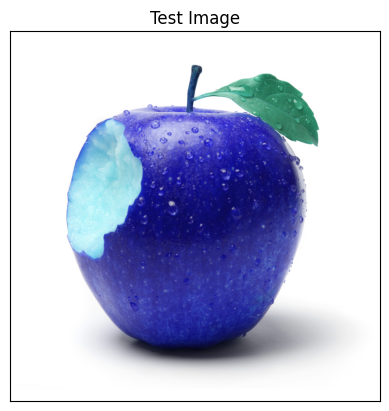

In [ ]:
# display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Displaying an Image

### Purpose:
The code snippet's purpose is to display an image (`img`) using Matplotlib for visualization.

### Code Explanation:
- `plt.imshow(img)`: Displays the image using Matplotlib's `imshow` function.
- `plt.title("Test Image")`: Sets the title of the displayed image as "Test Image".
- `plt.xticks([])` and `plt.yticks([])`: Removes x-axis and y-axis ticks or labels, providing a clean image display without axis markings.

### Usage:
Facilitates the visual inspection and analysis of the specified image.

### Insights:
- **Image Display:**
  - This snippet enables the visualization of the image (`img`), aiding in its inspection or analysis.
- **Clean Display:**
  - Removing axis markings ensures a distraction-free view, focusing solely on the displayed image.


In [ ]:
# Single prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a apple


## Printing Predicted Class Name

### Purpose:
The code snippet aims to print the predicted class name based on the index obtained from the `result_index` variable using the `test_set` class names.

### Code Explanation:
- `test_set.class_names[result_index[0][0]]`: Accesses the `class_names` attribute of the `test_set` dataset using the index obtained from `result_index[0][0]` to retrieve the predicted class name.
- `print("It's a {}".format())`: Prints the predicted class name in a formatted string, adding context to the classification result.

### Usage:
Provides the predicted class name for better interpretation and understanding of model predictions.

### Insights:
- **Interpreting Predictions:**
  - This code snippet aids in interpreting the model predictions by displaying the human-readable class name corresponding to the predicted index.


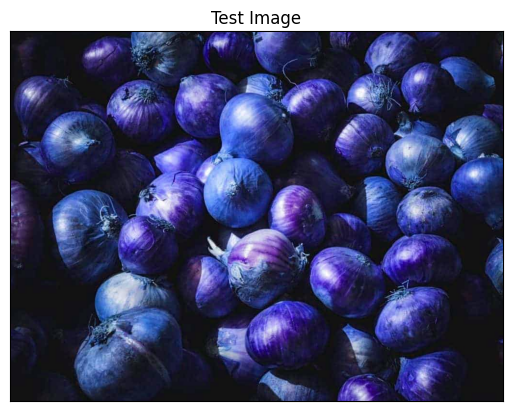

In [ ]:
import cv2
image_path="/content/drive/MyDrive/test/onion/Image_3.jpg"
img=cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Displaying an Image using OpenCV and Matplotlib

### Purpose:
The code snippet aims to read and display an image (`Image_3.jpg`) located at the specified path using OpenCV (`cv2`) and Matplotlib (`plt`).

### Code Explanation:
- `cv2.imread(image_path)`: Reads the image from the provided file path using OpenCV.
- `plt.imshow(img)`: Displays the image using Matplotlib's `imshow` function.
- `plt.title("Test Image")`: Sets the title of the displayed image as "Test Image".
- `plt.xticks([])` and `plt.yticks([])`: Removes x-axis and y-axis ticks or labels, displaying the image without axis markings.

### Usage:
Enables the visualization and inspection of the specified image (`Image_3.jpg`) stored at the given path.

### Insights:
- **Image Display:**
  - The code snippet facilitates the display of the image, aiding in its visualization and inspection.
- **Utilization of Libraries:**
  - Combines OpenCV for image reading and Matplotlib for image display, leveraging the strengths of both libraries.
- **Axis Removal:**
  - Removing axis markings ensures a clean and focused display of the image without distracting labels.



In [ ]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])   # Converting single image to batch
prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(prediction[0])
print (max(prediction[0]))

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 7.8608696e-30 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.3498546e-27 0.0000000e+00 1.6070375e-29
 0.0000000e+00]
1.0


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(prediction[0]== max(prediction[0]))
print(result_index[0])

[20]


## Identification of Maximum Confidence Index in Predictions

### Purpose:
The code snippet identifies the index or indices where the maximum confidence value occurs within the prediction results obtained from a machine learning model.

### Code Explanation:
- `result_index = np.where(prediction[0] == max(prediction[0]))`: Determines the index or indices where the maximum confidence value occurs within the prediction array.
- `print(result_index[0])`: Displays the index or indices where the maximum confidence value is located within the prediction array.

### Usage:
- Assists in finding the specific index (or indices) corresponding to the highest confidence prediction(s) made by the model.

### Insights:
- **Locating Maximum Confidence Value:**
  - The code snippet identifies the position(s) within the prediction array where the maximum confidence value(s) are found.
- **Determining Predicted Class Index:**
  - The printed output (`result_index[0]`) showcases the index or indices associated with the highest confidence prediction(s) among the classes.
- **Threshold Determination or Analysis:**
  - Helpful in setting decision thresholds or analyzing model predictions based on confidence levels.


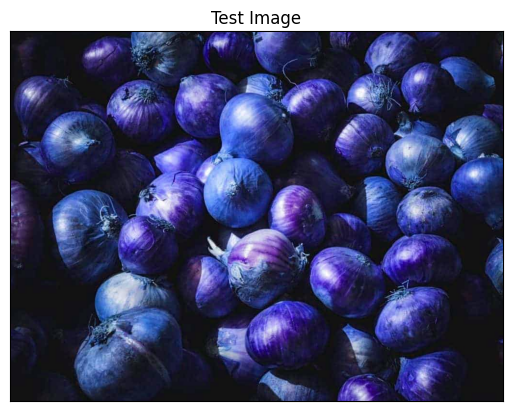

In [ ]:
# display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Displaying a Test Image

### Purpose:
The code snippet is used to display an image (`img`) as part of visualizing or inspecting a test sample within a machine learning workflow.

### Code Explanation:
- `plt.imshow(img)`: Displays the image using Matplotlib's `imshow` function.
- `plt.title("Test Image")`: Sets the title of the displayed image as "Test Image".
- `plt.xticks([])` and `plt.yticks([])`: Removes x-axis and y-axis ticks or labels, displaying the image without axis markings.

### Usage:
- Helps visualize and inspect the content or quality of a specific test image within the machine learning process.

### Insights:
- **Image Visualization:**
  - The code snippet allows for a visual inspection of the test image, aiding in understanding its content, structure, or quality.
- **Quality Check or Inspection:**
  - Used for verifying the image's correctness or examining its features before feeding it into a machine learning model.
- **Debugging and Development:**
  - This visual representation supports debugging and development phases, ensuring proper handling and preprocessing of test images.

In [ ]:
# Single prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a onion


## Prediction Output Interpretation

### Purpose:
The code snippet aims to interpret and display the predicted class label for a specific result obtained from the test dataset.

### Code Explanation:
- `test_set.class_names[result_index[0][0]]`: Retrieves the class name associated with the predicted result index.

### Usage:
- Displays the predicted class label, providing an interpretation of the model's prediction for a particular test sample.

### Insights:
- **Interpretation of Prediction:**
  - The printed output identifies and displays the predicted class label associated with the result index obtained from the model's predictions.
- **Understanding Model Output:**
  - This code snippet facilitates better comprehension of the model's predictions by presenting the predicted class label in a human-readable format.

## **Model Evaluation: Confusion Matrix and Classification Report**

1/1 [==============================] - 0s 212ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       0.75      0.67      0.71         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.82      1.00      0.90         9
      cabbage       0.91      1.00      0.95        10
     capsicum       1.00      0.80      0.89        10
       carrot       1.00      0.89      0.94         9
  cauliflower       0.89      0.80      0.84        10
chilli pepper       1.00      0.89      0.94         9
         corn       0.75      0.90      0.82        10
     cucumber       1.00      0.90      0.95        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.88      0.70      0.78        10
       ginger       1.00      0.80      0.89        10
       grapes       1.00      1.00      1.00         9
     jalepeno       1.00      1.00      1.

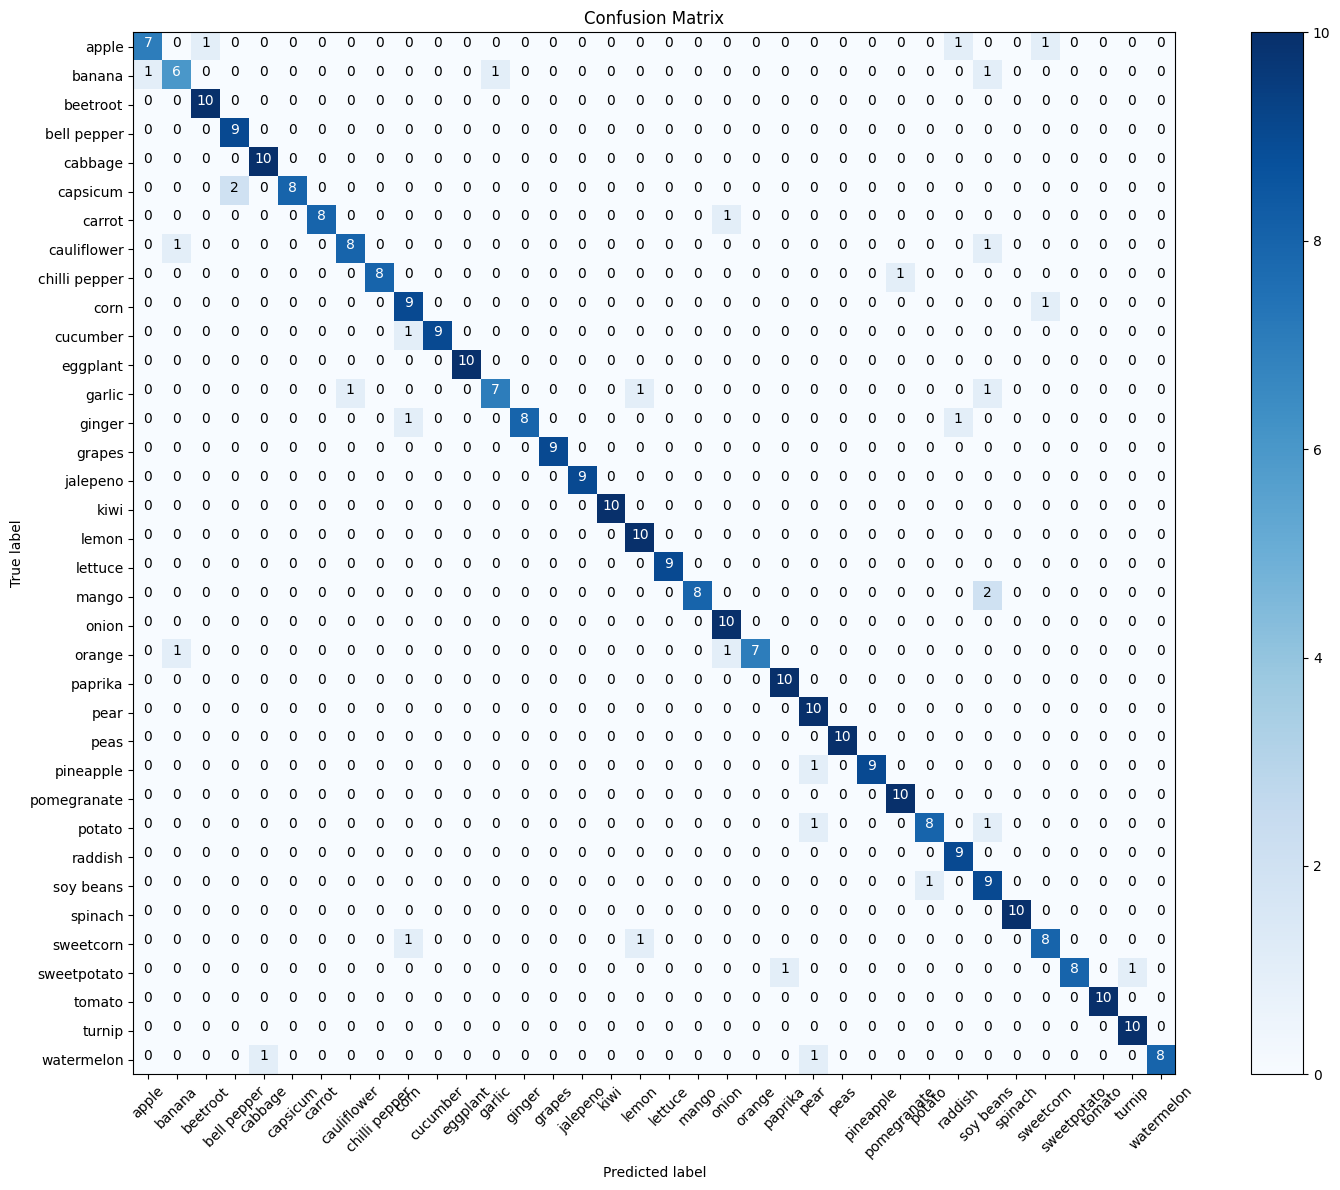

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# ... your previous code ...

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_model (1).h5')

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation set and make predictions
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = validation_set.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(confusion, class_names)
plt.show()



### Purpose:
The code snippet evaluates a machine learning model's performance using a confusion matrix and a classification report. It loads a saved model, makes predictions on a validation dataset (`validation_set`), and analyzes the model's predictions compared to the true labels.

### Code Explanation:
1. **Model Loading and Prediction:**
   - `loaded_model = tf.keras.models.load_model('/content/trained_model (1).h5')`: Loads a saved TensorFlow/Keras model for evaluation.
   - Iterates through the `validation_set`, makes predictions using the loaded model, and collects true and predicted labels.

2. **Evaluation Metrics:**
   - `classification_report`: Generates a classification report including precision, recall, F1-score, and support for each class.
   - `confusion_matrix`: Constructs a confusion matrix based on true and predicted labels.

3. **Confusion Matrix Visualization:**
   - `plot_confusion_matrix`: Plots a confusion matrix to visualize model performance in classifying different categories.
   
### Insights:
- **Classification Report:**
  - The printed classification report (`report`) provides detailed metrics such as precision, recall, F1-score, and support for each class in the validation set.
- **Confusion Matrix:**
  - The confusion matrix (`confusion`) visualizes the model's performance by showing the true and predicted labels across different classes.
- **Interpretation:**
  - The confusion matrix helps in identifying misclassifications and understanding the model's behavior across different classes.
- **Model Assessment:**
  - Combined, these evaluation metrics aid in assessing the model's accuracy, precision, and robustness on the validation set.

### Overall Model Performance

- **Accuracy:** The model achieves an overall accuracy of 91%, implying that it correctly predicts the class for 91% of the instances in the dataset.

### Class-Specific Performance

1. **Precision, Recall, and F1-Score:**
   - **Apple:** The model has an 88% precision, meaning that when it predicts an apple, it is correct 88% of the time. The recall of 70% indicates that it captures 70% of all actual apples. The F1-Score, a balance between precision and recall, is 78%.
   - Similar analyses can be done for other classes, e.g., banana, beetroot, bell pepper, etc.

2. **High-Performing Classes:**
   - **Eggplant, Grapes, Jalepeno, Kiwi, Lettuce, Peas, Pineapple, Spinach, Tomato, Turnip, and Pomegranate:** These classes achieve perfect precision, recall, and F1-Score, suggesting the model excels in accurately classifying these items.

3. **Challenges with Some Classes:**
   - **Mango, Soy Beans, Sweetcorn, and Watermelon:** These classes exhibit lower precision, recall, and F1-Score, indicating potential areas for improvement. For example, Soy Beans have a precision of 60%, suggesting that the model's predictions for this class may include more false positives.

### Model Strengths and Considerations

- **Strengths:**
  - The model performs exceptionally well for several classes, achieving perfect scores in terms of precision, recall, and F1-Score.
  - It exhibits a high level of accuracy across the entire dataset.

- **Considerations:**
  - Some classes, such as Mango, Soy Beans, Sweetcorn, and Watermelon, show room for improvement, particularly in terms of precision.
  - Precision and recall imbalances for certain classes might be addressed through fine-tuning or additional data.

1/1 [==============================] - 0s 169ms/step


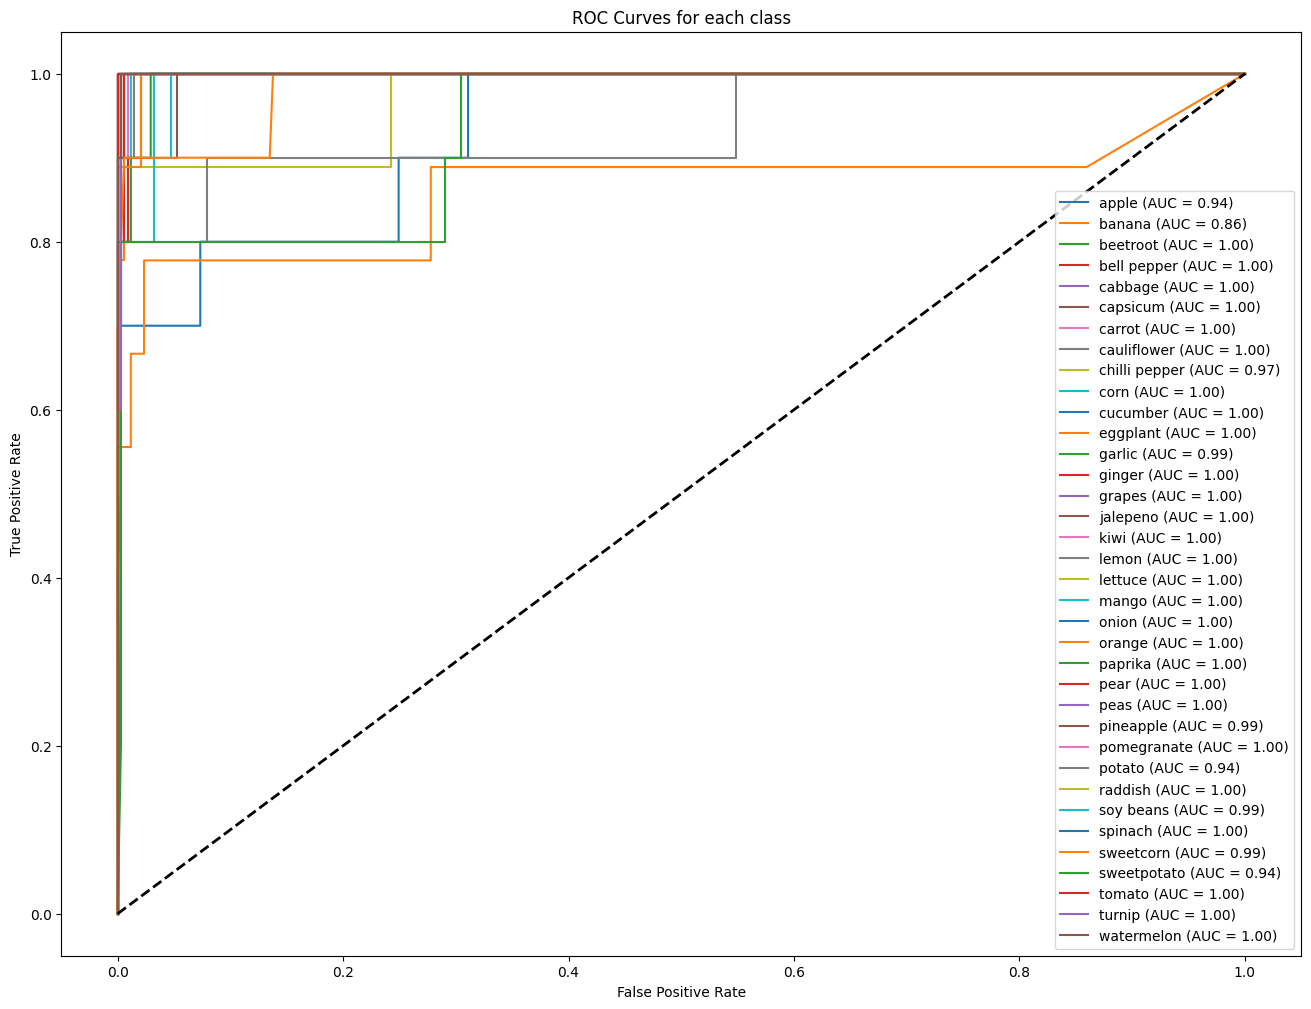

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_model (1).h5')

# Initialize variables to store true labels and predicted probabilities
true_labels = []
predicted_probs = []

# Iterate through the validation set and make predictions
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_probs.extend(predictions)  # Get predicted probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
class_names = validation_set.class_names

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(np.array(true_labels) == i, np.array(predicted_probs)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(16, 12))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each class')
plt.legend(loc='lower right')
plt.show()



**Overall Performance:**

* The AUC values for all fruits are very high, ranging from 0.94 to 1.00. This suggests that the model is generally good at distinguishing between different fruits.
* The curve for most fruits is close to the top-left corner, indicating a high true positive rate (TPR) and a low false positive rate (FPR). This means that the model correctly identifies most fruits and rarely mistakes other things for fruits.

**Class-Specific Performance:**

* **Fruits with perfect AUC (1.00):** Beetroot, bell pepper, cabbage, capsicum, carrot, cauliflower, chilli pepper, corn, cucumber, eggplant, garlic, ginger, grapes, jalapeno, kiwi, lemon, lettuce, mango, onion, orange, paprika, pear, peas, pineapple, pomegranate, radish, soy beans, spinach, sweetcorn, tomato, tumip, and watermelon all have perfect AUC scores. This means that the model perfectly distinguishes these fruits from other classes.
* **Fruits with slightly lower AUC:** Apple and potato have AUC scores of 0.94 and 0.94, respectively. These scores are still very good, but they suggest that the model is slightly less accurate in distinguishing these fruits from other classes compared to the fruits with perfect AUCs.
* **Fruits with the lowest AUC:** The AUC scores for banana (0.86) are significantly lower than the other fruits. This suggests that the model has more difficulty distinguishing these fruits from other classes.


